In [1]:
from manim import *

Manim Community v0.9.0

# Notebook Outline

`PerfectRiffleDemo` is a scene which demonstrates the issue with the "perfect" riffle shuffle, in which the deck is cut exactly in half and interleaved. This was cut from my presentation for time, but is included here. Its goal is to develop the intuition that a measure of randomness should be based on more than just one given arrangement of the deck.

`ImperfectRiffle` is a demonstration of the Gilbert-Shannon-Reeds model of riffle shuffling.

`ShuffleWithGraph` places a graph of the maximum same-color clump size next to the deck. This was to propose clumping as a method of measuring entropy in a deck, but was also cut for time.

`ShuffleWithGraphTVD` graphs the approximate probability distribution on the group of permutations of the deck, next to a deck being shuffled visually. See presentation slides for a characterization of this probability distribution.

`TVD` is a single-frame graphic used to help characterize the total variation distance, which is an otherwise tricky concept.

In [102]:
%%manim Cut
class Cut(Scene):
    """Cut and align two halves of a deck of different colors."""
    def construct(self):
        N = 12  # number of cards
        epsilon = 0.25  # indicates horizontal distance between halves of the deck
        squish = 0.25  # 0 <= squish <= 1, indicates distance between cards
        starts = [[-1, y*squish, 0] for y in range(N)]
        ends = [[1, y*squish, 0] for y in range(N)]
        #colors = [RED for _ in range(N//2)] + [BLUE for _ in range(N//2)]
        colors = [RED for _ in range(N)]
        red_lines = [Line(a, b, color=RED) for a, b in zip(starts[:N//2], ends[:N//2])]
        blue_lines = [Line(a, b, color=BLUE) for a, b in zip(starts[N//2:], ends[N//2:])]
        left = VGroup(*red_lines)
        right = VGroup(*blue_lines)
        self.add(left)
        self.add(right)
        
        left.generate_target()
        right.generate_target()
        
        right.target.shift(RIGHT)
        right.target.shift([epsilon, 0, 0])
        
        left.target.shift(LEFT)
        left.target.shift([-epsilon, 0, 0])
        
        self.play(MoveToTarget(left), MoveToTarget(right))
        
        left.target.shift(squish*N//2*UP)  # height of the other half the deck
        right.target.move_to(left.target)
        right.target.shift([2+2*epsilon, 0, 0])  # fix x-offset after targeting at the left stack
        self.play(MoveToTarget(left), MoveToTarget(right))
        self.wait(1)

[11/24/21 17:46:55] INFO     Animation 0 : Using cached data (hash :    ]8;id=794919;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             450974505_3364766496_417480282)

                    INFO     Animation 1 : Using cached data (hash :    ]8;id=795260;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_1052539381_417480282)

                    INFO     Animation 2 : Using cached data (hash :    ]8;id=276462;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_947195380_2581510911)

                    INFO                                             ]8;id=641821;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final                                      
                             Project\1080p60\Cut.mp4'

                    INFO     Rendered Cut                                        ]8;id=813855;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 3 animations

In [373]:
def CutAndShuffle(scene, deck, N, epsilon, squish):
    """Given a list of line mobjects, cut them in two and interleave them as if riffle shuffling."""
    # Cut and arrange deck
    cut = N//2  # replace with any method of generating an index 0 <= cut <= N
    left = VGroup(*deck[:N//2])
    right = VGroup(*deck[N//2:])
    #scene.add(left)
    #scene.add(right)

    left.generate_target()
    right.generate_target()

    right.target.shift(RIGHT)
    right.target.shift([epsilon, 0, 0])

    left.target.shift(LEFT)
    left.target.shift([-epsilon, 0, 0])

    scene.play(MoveToTarget(left), MoveToTarget(right))

    left.target.shift(squish*N//2*UP)  # height of the other half the deck
    right.target.move_to(left.target)
    right.target.shift([2+2*epsilon, 0, 0])  # fix x-offset after targeting at the left stack
    scene.play(MoveToTarget(left), MoveToTarget(right))
    scene.wait(0.5)
    
    # Shuffle deck by placing cards one at a time from the piles
    order = "01"*(N//2)  # replace with any bitstring specifying order for taking cards from left and right pile, with 0 = left, 1 = right
    target = Dot([0, -N*squish, 0])
    new_deck = []
    for s in order:
        if s == "0":
            next_card = left[0]
            left -= next_card
        else:
            next_card = right[0]
            right -= next_card
        next_card.generate_target()
        next_card.target.move_to(target)
        scene.play(MoveToTarget(next_card), run_time=0.25)
        target = next_card.copy()
        target.shift(squish*UP)
        new_deck.append(next_card)  # build the new deck in the new order
    
    cards = VGroup(*deck)
    cards.generate_target()
    cards.target.move_to(ORIGIN)
    scene.play(MoveToTarget(cards))
    scene.wait(0.5)
    return new_deck

In [178]:
%%manim PerfectRiffleDemo
class PerfectRiffleDemo(Scene):
    def construct(self):
        N = 10
        epsilon = 0.25  # indicates horizontal distance between halves of the deck
        squish = 0.25  # 0 <= squish <= 1, indicates distance between cards
        
        # build the starting deck
        starts = [[-1, y*squish, 0] for y in range(N)]
        ends = [[1, y*squish, 0] for y in range(N)]

        red_lines = [Line(a, b, color=RED) for a, b in zip(starts[:N//2], ends[:N//2])]
        blue_lines = [Line(a, b, color=BLUE) for a, b in zip(starts[N//2:], ends[N//2:])]
        deck = red_lines + blue_lines
        
        self.add(*deck)
        self.wait(1)
        
        deck = CutAndShuffle(self, deck, N, epsilon, squish)
        deck = CutAndShuffle(self, deck, N, epsilon, squish)
        deck = CutAndShuffle(self, deck, N, epsilon, squish)
        deck = CutAndShuffle(self, deck, N, epsilon, squish)

[11/24/21 22:03:20] INFO     Animation 0 : Partial movie file        ]8;id=920864;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\450974505_1426697731_2253428237.mp4'

[11/24/21 22:03:22] INFO     Animation 1 : Partial movie file        ]8;id=320509;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3424948585_3110438328.mp4'

[11/24/21 22:03:24] INFO     Animation 2 : Partial movie file        ]8;id=282152;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_4221058550_3110438328.mp4'

                    INFO     Animation 3 : Partial movie file        ]8;id=480916;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_1705821232.mp4'

[11/24/21 22:03:25] INFO     Animation 4 : Partial movie file        ]8;id=729886;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_866437157_3141106671.mp4'

[11/24/21 22:03:26] INFO     Animation 5 : Partial movie file        ]8;id=132348;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2319566890_137127828.mp4'

                    INFO     Animation 6 : Partial movie file        ]8;id=248795;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_1922670307_3230138209.mp4'

[11/24/21 22:03:27] INFO     Animation 7 : Partial movie file        ]8;id=277642;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_4005989562_1683183176.mp4'

[11/24/21 22:03:28] INFO     Animation 8 : Partial movie file        ]8;id=326802;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2037295201_1825442356.mp4'

[11/24/21 22:03:29] INFO     Animation 9 : Partial movie file        ]8;id=149267;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_4149315450_467097300.mp4'

                    INFO     Animation 10 : Partial movie file       ]8;id=538680;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3386062502_3517828142.mp4'

[11/24/21 22:03:30] INFO     Animation 11 : Partial movie file       ]8;id=506245;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3346412568_3886101466.mp4'

[11/24/21 22:03:31] INFO     Animation 12 : Partial movie file       ]8;id=926519;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2621416928_1008962137.mp4'

                    INFO     Animation 13 : Partial movie file       ]8;id=388796;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_1640661563_3933208825.mp4'

[11/24/21 22:03:33] INFO     Animation 14 : Partial movie file       ]8;id=397086;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_1080488953_837896589.mp4'

[11/24/21 22:03:34] INFO     Animation 15 : Partial movie file       ]8;id=690342;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_17508738.mp4'

[11/24/21 22:03:36] INFO     Animation 16 : Partial movie file       ]8;id=937089;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2361485562_437649007.mp4'

[11/24/21 22:03:39] INFO     Animation 17 : Partial movie file       ]8;id=196612;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2990180309_437649007.mp4'

                    INFO     Animation 18 : Partial movie file       ]8;id=392950;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_3077888002.mp4'

[11/24/21 22:03:40] INFO     Animation 19 : Partial movie file       ]8;id=932104;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2877203303_2557005572.mp4'

[11/24/21 22:03:41] INFO     Animation 20 : Partial movie file       ]8;id=737565;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2770664163_3129014226.mp4'

[11/24/21 22:03:42] INFO     Animation 21 : Partial movie file       ]8;id=954550;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3139913218_1472867780.mp4'

[11/24/21 22:03:43] INFO     Animation 22 : Partial movie file       ]8;id=333173;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_1366389933_2111611911.mp4'

[11/24/21 22:03:44] INFO     Animation 23 : Partial movie file       ]8;id=579616;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_1541071754_2076252615.mp4'

                    INFO     Animation 24 : Partial movie file       ]8;id=953891;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3444571322_255526341.mp4'

[11/24/21 22:03:45] INFO     Animation 25 : Partial movie file       ]8;id=816700;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3450587813_3488466448.mp4'

[11/24/21 22:03:46] INFO     Animation 26 : Partial movie file       ]8;id=412350;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_774517696_536446578.mp4'

[11/24/21 22:03:47] INFO     Animation 27 : Partial movie file       ]8;id=782642;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3859718082_3606901811.mp4'

[11/24/21 22:03:48] INFO     Animation 28 : Partial movie file       ]8;id=996841;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2250035655_860652451.mp4'

[11/24/21 22:03:50] INFO     Animation 29 : Partial movie file       ]8;id=26470;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3811776087_4144525333.mp4'

[11/24/21 22:03:51] INFO     Animation 30 : Partial movie file       ]8;id=985745;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_3290586648.mp4'

[11/24/21 22:03:53] INFO     Animation 31 : Partial movie file       ]8;id=268787;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3361830746_1610082090.mp4'

[11/24/21 22:03:55] INFO     Animation 32 : Partial movie file       ]8;id=587433;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_4009155419_1610082090.mp4'

                    INFO     Animation 33 : Partial movie file       ]8;id=401806;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_2952824865.mp4'

[11/24/21 22:03:56] INFO     Animation 34 : Partial movie file       ]8;id=172465;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2877203303_868845986.mp4'

[11/24/21 22:03:57] INFO     Animation 35 : Partial movie file       ]8;id=332624;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2546803367_229976679.mp4'

[11/24/21 22:03:58] INFO     Animation 36 : Partial movie file       ]8;id=771321;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2868215323_2925659310.mp4'

[11/24/21 22:03:59] INFO     Animation 37 : Partial movie file       ]8;id=112731;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2402879335_4208567212.mp4'

                    INFO     Animation 38 : Partial movie file       ]8;id=613358;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_4276279908_2552861656.mp4'

[11/24/21 22:04:00] INFO     Animation 39 : Partial movie file       ]8;id=640341;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_948808675_2350626472.mp4'

[11/24/21 22:04:01] INFO     Animation 40 : Partial movie file       ]8;id=381003;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3131443866_3864600964.mp4'

[11/24/21 22:04:02] INFO     Animation 41 : Partial movie file       ]8;id=153258;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_1969515857_1960483535.mp4'

                    INFO     Animation 42 : Partial movie file       ]8;id=125634;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_247219383_2106257909.mp4'

[11/24/21 22:04:03] INFO     Animation 43 : Partial movie file       ]8;id=226521;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2250035655_2025087526.mp4'

[11/24/21 22:04:05] INFO     Animation 44 : Partial movie file       ]8;id=456848;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3664774635_2875196083.mp4'

[11/24/21 22:04:06] INFO     Animation 45 : Partial movie file       ]8;id=239370;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_1000425890.mp4'

[11/24/21 22:04:08] INFO     Animation 46 : Partial movie file       ]8;id=27246;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2308607217_4150729466.mp4'

[11/24/21 22:04:10] INFO     Animation 47 : Partial movie file       ]8;id=853430;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3531083666_4150729466.mp4'

[11/24/21 22:04:11] INFO     Animation 48 : Partial movie file       ]8;id=881775;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_2676892563.mp4'

[11/24/21 22:04:12] INFO     Animation 49 : Partial movie file       ]8;id=51192;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2877203303_1345207299.mp4'

                    INFO     Animation 50 : Partial movie file       ]8;id=981101;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_4040360433_1191563824.mp4'

[11/24/21 22:04:13] INFO     Animation 51 : Partial movie file       ]8;id=958230;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3619001773_753341416.mp4'

[11/24/21 22:04:14] INFO     Animation 52 : Partial movie file       ]8;id=493595;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_1366389933_54200071.mp4'

[11/24/21 22:04:15] INFO     Animation 53 : Partial movie file       ]8;id=677855;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_4012958333_4181728785.mp4'

[11/24/21 22:04:16] INFO     Animation 54 : Partial movie file       ]8;id=202970;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2627662012_3294541116.mp4'

                    INFO     Animation 55 : Partial movie file       ]8;id=429639;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3450587813_3841953254.mp4'

[11/24/21 22:04:17] INFO     Animation 56 : Partial movie file       ]8;id=328764;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3231516129_1862354287.mp4'

[11/24/21 22:04:18] INFO     Animation 57 : Partial movie file       ]8;id=66754;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2404739153_2951282356.mp4'

[11/24/21 22:04:19] INFO     Animation 58 : Partial movie file       ]8;id=764783;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_2250035655_1109785984.mp4'

[11/24/21 22:04:21] INFO     Animation 59 : Partial movie file       ]8;id=232617;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_3503215268_3493837319.mp4'

[11/24/21 22:04:22] INFO     Animation 60 : Partial movie file       ]8;id=524744;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\PerfectRiffleDe                         
                             mo\34786186_510747927_2458326662.mp4'

                    INFO                                             ]8;id=702815;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final                                      
                             Project\1080p60\PerfectRiffleDemo.mp4'

                    INFO     The partial movie directory is full (>  ]8;id=801525;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:575
                             100 files). Therefore, manim has                                
                             removed 21 file(s) used by it the                               
                             longest ago.You can change this                                 
                             behaviour by changing max_files_cached                          
                             in config.

                    INFO     Rendered PerfectRiffleDemo                          ]8;id=530705;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 61 animations

In [339]:
import math
import random

def generate_riffle_shuffle(N, cutoff):
    """Generate a bitstring of length N according to the riffle shuffle model described by Saloff-Coste, p. 273-4.
    Allows a cutoff to be fed in for use with CutAndShuffleRandomly."""
    deck = ("0"*(cutoff)) + ("1"*(N-cutoff))
    pile1 = deck[:cutoff]
    pile2 = deck[cutoff:]
    a = len(pile1)
    b = len(pile2)
    final_deck = ""

    while pile1 or pile2:
        # as long as one pile has cards in it, a/(a+b) won't let an empty pile get picked
        r = random.random()
        if r <= a/(a+b):
            next_card = pile1[-1]  # grab the last card
            pile1 = pile1[:-1]
        else:
            next_card = pile2[-1]
            pile2 = pile2[:-1]

        final_deck = next_card + final_deck
        a = len(pile1)
        b = len(pile2)

        deck = final_deck

    return deck

def CutAndShuffleRandomly(scene, deck, N, epsilon, squish, deck_x):
    """Given a list of line mobjects, cut them in two and interleave them as if riffle shuffling."""
    # Cut and arrange deck
    r = random.random()
    total = 0
    for k in range(0, N+1):  # pick where to cut the deck
        binom = math.comb(N, k)/(2**N)
        total += binom
        if r <= total:
            cut = k
            break
    
    left = VGroup(*deck[:cut])
    right = VGroup(*deck[cut:])

    left.generate_target()
    right.generate_target()

    right.target.shift(RIGHT)
    right.target.shift([epsilon, 0, 0])

    left.target.shift(LEFT)
    left.target.shift([-epsilon, 0, 0])

    scene.play(MoveToTarget(left), MoveToTarget(right))

    left.target.shift(squish*cut*UP)  # height of the other half the deck
    right.target.move_to(left.target)
    right.target.shift([2+2*epsilon, 0, 0])  # fix x-offset after targeting at the left stack
    scene.play(MoveToTarget(left), MoveToTarget(right))
    scene.wait(0.5)
    
    # Shuffle deck by placing cards one at a time from the piles
    order = generate_riffle_shuffle(N, cut)  # replace with any bitstring specifying order for taking cards from left and right pile, with 0 = left, 1 = right
    target = Dot([deck_x, -N*squish, 0])
    new_deck = []
    for s in order:
        if s == "0":
            next_card = left[0]
            left -= next_card
        else:
            next_card = right[0]
            right -= next_card
        next_card.generate_target()
        next_card.target.move_to(target)
        scene.play(MoveToTarget(next_card), run_time=0.125)
        target = next_card.copy()
        target.shift(squish*UP)
        new_deck.append(next_card)  # build the new deck in the new order
    
    cards = VGroup(*deck)
    cards.generate_target()
    cards.target.move_to([deck_x, 0, 0])
    scene.play(MoveToTarget(cards))
    scene.wait(0.5)
    return new_deck

In [279]:
%%manim ImperfectRiffle
class ImperfectRiffle(Scene):
    def construct(self):
        N = 10
        epsilon = 0.25  # indicates horizontal distance between halves of the deck
        squish = 0.25  # 0 <= squish <= 1, indicates distance between cards
        deck_x = 0
        
        # build the starting deck
        starts = [[-1, y*squish, 0] for y in range(N)]
        ends = [[1, y*squish, 0] for y in range(N)]

        red_lines = [Line(a, b, color=RED) for a, b in zip(starts[:N//2], ends[:N//2])]
        blue_lines = [Line(a, b, color=BLUE) for a, b in zip(starts[N//2:], ends[N//2:])]
        deck = red_lines + blue_lines
        self.add(*deck)
        self.wait(1)
        
        deck = CutAndShuffleRandomly(self, deck, N, epsilon, squish, deck_x)
        deck = CutAndShuffleRandomly(self, deck, N, epsilon, squish, deck_x)

[11/25/21 14:37:18] INFO     Animation 0 : Using cached data (hash :    ]8;id=523275;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             450974505_1426697731_2253428237)

INFO:manim:Animation 0 : Using cached data (hash : 450974505_1426697731_2253428237)


                    INFO     Animation 1 : Using cached data (hash :    ]8;id=996015;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_4290342175_3110438328)

INFO:manim:Animation 1 : Using cached data (hash : 34786186_4290342175_3110438328)


                    INFO     Animation 2 : Using cached data (hash :    ]8;id=844856;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_2832138677_3110438328)

INFO:manim:Animation 2 : Using cached data (hash : 34786186_2832138677_3110438328)


[11/25/21 14:37:19] INFO     Animation 3 : Using cached data (hash :    ]8;id=53923;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_510747927_485138996)

INFO:manim:Animation 3 : Using cached data (hash : 34786186_510747927_485138996)


                    INFO     Animation 4 : Partial movie file        ]8;id=826013;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4152013538_2791629536.mp4'

INFO:manim:Animation 4 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_4152013538_2791629536.mp4'


[11/25/21 14:37:20] INFO     Animation 5 : Partial movie file        ]8;id=162241;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2636262588_3424468299.mp4'

INFO:manim:Animation 5 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2636262588_3424468299.mp4'


[11/25/21 14:37:21] INFO     Animation 6 : Partial movie file        ]8;id=323604;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2894170159_853747548.mp4'

INFO:manim:Animation 6 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2894170159_853747548.mp4'


[11/25/21 14:37:22] INFO     Animation 7 : Partial movie file        ]8;id=590547;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1573122701_1635147081.mp4'

INFO:manim:Animation 7 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1573122701_1635147081.mp4'


[11/25/21 14:37:23] INFO     Animation 8 : Partial movie file        ]8;id=155596;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2662432415_2052581903.mp4'

INFO:manim:Animation 8 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2662432415_2052581903.mp4'


[11/25/21 14:37:24] INFO     Animation 9 : Partial movie file        ]8;id=539421;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2728184510_1611554534.mp4'

INFO:manim:Animation 9 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2728184510_1611554534.mp4'


[11/25/21 14:37:25] INFO     Animation 10 : Partial movie file       ]8;id=766236;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4255521818_2025866888.mp4'

INFO:manim:Animation 10 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_4255521818_2025866888.mp4'


[11/25/21 14:37:26] INFO     Animation 11 : Partial movie file       ]8;id=714913;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4130386910_1070399310.mp4'

INFO:manim:Animation 11 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_4130386910_1070399310.mp4'


                    INFO     Animation 12 : Partial movie file       ]8;id=641506;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4082283464_1692098992.mp4'

INFO:manim:Animation 12 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_4082283464_1692098992.mp4'


[11/25/21 14:37:27] INFO     Animation 13 : Partial movie file       ]8;id=160798;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2988763448_2414778777.mp4'

INFO:manim:Animation 13 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2988763448_2414778777.mp4'


[11/25/21 14:37:30] INFO     Animation 14 : Partial movie file       ]8;id=193331;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1426303812_2193491159.mp4'

INFO:manim:Animation 14 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1426303812_2193491159.mp4'


[11/25/21 14:37:31] INFO     Animation 15 : Partial movie file       ]8;id=54191;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_493709404.mp4'

INFO:manim:Animation 15 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_510747927_493709404.mp4'


[11/25/21 14:37:33] INFO     Animation 16 : Partial movie file       ]8;id=556155;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1024105731_1224896712.mp4'

INFO:manim:Animation 16 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1024105731_1224896712.mp4'


[11/25/21 14:37:35] INFO     Animation 17 : Partial movie file       ]8;id=669174;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1595014228_1224896712.mp4'

INFO:manim:Animation 17 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1595014228_1224896712.mp4'


[11/25/21 14:37:37] INFO     Animation 18 : Partial movie file       ]8;id=519267;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_1371076779.mp4'

INFO:manim:Animation 18 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_510747927_1371076779.mp4'


                    INFO     Animation 19 : Partial movie file       ]8;id=654913;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1891967703_127726217.mp4'

INFO:manim:Animation 19 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1891967703_127726217.mp4'


[11/25/21 14:37:38] INFO     Animation 20 : Partial movie file       ]8;id=811159;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2808252954_3395606125.mp4'

INFO:manim:Animation 20 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2808252954_3395606125.mp4'


[11/25/21 14:37:39] INFO     Animation 21 : Partial movie file       ]8;id=953990;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3701335744_4074368524.mp4'

INFO:manim:Animation 21 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3701335744_4074368524.mp4'


[11/25/21 14:37:40] INFO     Animation 22 : Partial movie file       ]8;id=286402;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_33453838_2514670204.mp4'

INFO:manim:Animation 22 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_33453838_2514670204.mp4'


[11/25/21 14:37:41] INFO     Animation 23 : Partial movie file       ]8;id=699628;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4048903801_2262943650.mp4'

INFO:manim:Animation 23 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_4048903801_2262943650.mp4'


[11/25/21 14:37:42] INFO     Animation 24 : Partial movie file       ]8;id=425363;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_665595247_847256285.mp4'

INFO:manim:Animation 24 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_665595247_847256285.mp4'


[11/25/21 14:37:43] INFO     Animation 25 : Partial movie file       ]8;id=303456;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1794370518_773221756.mp4'

INFO:manim:Animation 25 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1794370518_773221756.mp4'


[11/25/21 14:37:44] INFO     Animation 26 : Partial movie file       ]8;id=633967;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3034398029_4257313229.mp4'

INFO:manim:Animation 26 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3034398029_4257313229.mp4'


[11/25/21 14:37:45] INFO     Animation 27 : Partial movie file       ]8;id=472581;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3823300931_3890564818.mp4'

INFO:manim:Animation 27 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3823300931_3890564818.mp4'


                    INFO     Animation 28 : Partial movie file       ]8;id=158327;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1187404643_901388541.mp4'

INFO:manim:Animation 28 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1187404643_901388541.mp4'


[11/25/21 14:37:48] INFO     Animation 29 : Partial movie file       ]8;id=867690;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3087862389_66585244.mp4'

INFO:manim:Animation 29 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3087862389_66585244.mp4'


[11/25/21 14:37:49] INFO     Animation 30 : Partial movie file       ]8;id=238174;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_2769650733.mp4'

INFO:manim:Animation 30 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_510747927_2769650733.mp4'


                    INFO                                             ]8;id=155654;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final                                      
                             Project\1080p60\ImperfectRiffle.mp4'

INFO:manim:
File ready at 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\ImperfectRiffle.mp4'



                    INFO     The partial movie directory is full (>  ]8;id=200182;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:575
                             100 files). Therefore, manim has                                
                             removed 27 file(s) used by it the                               
                             longest ago.You can change this                                 
                             behaviour by changing max_files_cached                          
                             in config.

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed 27 file(s) used by it the longest ago.You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered ImperfectRiffle                            ]8;id=977594;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 31 animations

INFO:manim:Rendered ImperfectRiffle
Played 31 animations


In [192]:
%manim ImperfectRiffle

[11/24/21 22:21:29] INFO     Animation 0 : Using cached data (hash :    ]8;id=774888;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             450974505_1426697731_2253428237)

[11/24/21 22:21:31] INFO     Animation 1 : Partial movie file        ]8;id=688928;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4290342175_3110438328.mp4'

[11/24/21 22:21:34] INFO     Animation 2 : Partial movie file        ]8;id=17970;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2832138677_3110438328.mp4'

[11/24/21 22:21:35] INFO     Animation 3 : Partial movie file        ]8;id=823583;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_485138996.mp4'

                    INFO     Animation 4 : Partial movie file        ]8;id=73661;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1879074154_4095176485.mp4'

[11/24/21 22:21:36] INFO     Animation 5 : Partial movie file        ]8;id=455694;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1119373537_3394533150.mp4'

[11/24/21 22:21:37] INFO     Animation 6 : Partial movie file        ]8;id=392473;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_452185409_2395066010.mp4'

[11/24/21 22:21:38] INFO     Animation 7 : Partial movie file        ]8;id=133054;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2877699799_677243609.mp4'

[11/24/21 22:21:39] INFO     Animation 8 : Partial movie file        ]8;id=211769;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3664484878_3963413397.mp4'

                    INFO     Animation 9 : Partial movie file        ]8;id=125874;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2728184510_2096534371.mp4'

[11/24/21 22:21:40] INFO     Animation 10 : Partial movie file       ]8;id=384890;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3865337966_3556701493.mp4'

[11/24/21 22:21:41] INFO     Animation 11 : Partial movie file       ]8;id=816995;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3128097896_2173097513.mp4'

[11/24/21 22:21:42] INFO     Animation 12 : Partial movie file       ]8;id=676206;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4082283464_2514049328.mp4'

[11/24/21 22:21:43] INFO     Animation 13 : Partial movie file       ]8;id=565732;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2988763448_1931120377.mp4'

[11/24/21 22:21:45] INFO     Animation 14 : Partial movie file       ]8;id=800302;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4110655878_2193491159.mp4'

[11/24/21 22:21:46] INFO     Animation 15 : Partial movie file       ]8;id=498659;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_4241433451.mp4'

[11/24/21 22:21:48] INFO     Animation 16 : Partial movie file       ]8;id=760011;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1811344803_1224896712.mp4'

[11/24/21 22:21:50] INFO     Animation 17 : Partial movie file       ]8;id=834832;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3683820082_1224896712.mp4'

[11/24/21 22:21:51] INFO     Animation 18 : Partial movie file       ]8;id=592557;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_1725554774.mp4'

[11/24/21 22:21:52] INFO     Animation 19 : Partial movie file       ]8;id=481009;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_406194922_601683565.mp4'

[11/24/21 22:21:53] INFO     Animation 20 : Partial movie file       ]8;id=522362;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_985326632_979950655.mp4'

[11/24/21 22:21:54] INFO     Animation 21 : Partial movie file       ]8;id=172231;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2797763068_4063615550.mp4'

                    INFO     Animation 22 : Partial movie file       ]8;id=653173;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2163769276_3140234678.mp4'

[11/24/21 22:21:55] INFO     Animation 23 : Partial movie file       ]8;id=578053;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_120131109_1831177498.mp4'

[11/24/21 22:21:56] INFO     Animation 24 : Partial movie file       ]8;id=893600;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1454444705_946124785.mp4'

[11/24/21 22:21:57] INFO     Animation 25 : Partial movie file       ]8;id=464022;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1450604506_1345658148.mp4'

                    INFO     Animation 26 : Partial movie file       ]8;id=293551;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2334562580_964741254.mp4'

[11/24/21 22:21:58] INFO     Animation 27 : Partial movie file       ]8;id=585526;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1101945852_2619623085.mp4'

[11/24/21 22:21:59] INFO     Animation 28 : Partial movie file       ]8;id=565720;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2250035655_797622841.mp4'

[11/24/21 22:22:01] INFO     Animation 29 : Partial movie file       ]8;id=727530;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_878937103_2224726781.mp4'

[11/24/21 22:22:03] INFO     Animation 30 : Partial movie file       ]8;id=301232;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_947276320.mp4'

                    INFO                                             ]8;id=307521;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final                                      
                             Project\1080p60\ImperfectRiffle.mp4'

                    INFO     The partial movie directory is full (>  ]8;id=786514;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:575
                             100 files). Therefore, manim has                                
                             removed 30 file(s) used by it the                               
                             longest ago.You can change this                                 
                             behaviour by changing max_files_cached                          
                             in config.

                    INFO     Rendered ImperfectRiffle                            ]8;id=69500;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 31 animations

In [280]:
# Useful functions from shufflingandmixing.ipynb
def count_clumps(b):
    """Given a binary number b, return the longest clump of 1s in b's binary representation.
    See https://www.geeksforgeeks.org/length-longest-consecutive-1s-binary-representation/"""
    x = b
    count = 0
    while x:
        x = x & (x << 1)
        count += 1
    return count

def flip_bits(b, L):
    """Given a binary number b, return b with all bits flipped. Will be considered of length L, so leading 0s
    added as needed."""
    x = bin(b)[2:]  # cut off the "0b" prefix
    x = ("0"*(L-len(x))) + x
    # I think we should just subtract b from the next highest power of 2
    # x = 2**(len(bin(b)) - 2) - b - 1
    y = int("0b" + x.replace("0", "p").replace("1", "0").replace("p", "1"), 2)
    # print(x == y)
    return y

In [313]:
def GraphClumps(scene, graph, deck, t):
    """Given a deck having undergone t shuffles, plots the max clump vs time on the given graph."""
    order = ""
    for card in deck:
        if str(card.get_color()).upper() == RED:
            order += "0"
        else:
            order += "1"
    n = len(order)
    b = int(order, 2)  # read it as a binary number
    clump = max([count_clumps(b), count_clumps(flip_bits(b, n))])
    point = Dot(graph.coords_to_point(t, clump), color=YELLOW)
    scene.play(FadeIn(point))
    return [t, clump]  # return a list containing x, y vals relative to graph

In [315]:
%%manim ShuffleWithGraph
class ShuffleWithGraph(Scene):
    def construct(self):
        N = 12
        epsilon = 0.25  # indicates horizontal distance between halves of the deck
        squish = 0.25  # 0 <= squish <= 1, indicates distance between cards
        deck_x = -2.5
        graph_x = 2
        x_len = 3
        y_len = 2
        max_shuffles = 7
        
        # create graph mobject
        ax = Axes(
            x_range=[0, max_shuffles, 1],
            y_range=[0, N//2, 1],
            x_length=x_len,
            y_length=y_len,
            tips=False,
            axis_config={"include_numbers": True},
        )
        ax.move_to([graph_x + (x_len//2), y_len//2, 0])
        self.add(ax)
        
        # build the starting deck
        starts = [[-1 + deck_x, y*squish, 0] for y in range(N)]
        ends = [[1 + deck_x, y*squish, 0] for y in range(N)]

        red_lines = [Line(a, b, color=RED) for a, b in zip(starts[:N//2], ends[:N//2])]
        blue_lines = [Line(a, b, color=BLUE) for a, b in zip(starts[N//2:], ends[N//2:])]
        deck = red_lines + blue_lines
        self.add(*deck)
        
        points = [[0, N//2]]  # NOT MOBJECTS; at 0 shuffles, the largest clump is always N//2
        self.add(Dot((0, N//2, 0.08), color=YELLOW))  # add the 0 shuffles point
        
        self.wait(1)
        for t in range(1, max_shuffles+1):
            # animate and update deck
            deck = CutAndShuffleRandomly(self, deck, N, epsilon, squish, deck_x)
            
            # animate graphing next point in clump graph
            points.append(GraphClumps(self, ax, deck, t))
            
            # create and animate line connecting new point to rest of graph
            p1 = points[t-1]
            p2 = points[t]
            xs = [p1[0], p2[0]]
            ys = [p1[1], p2[1]]
            self.play(FadeIn(ax.get_line_graph(x_values=xs, y_values=ys, add_vertex_dots=False)), run_time=0.25)
        
        self.wait(2)

[11/25/21 15:14:35] INFO     Animation 0 : Partial movie file        ]8;id=974921;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\450974505_1426697731_34491490.mp4'

INFO:manim:Animation 0 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\450974505_1426697731_34491490.mp4'


[11/25/21 15:14:37] INFO     Animation 1 : Partial movie file        ]8;id=235802;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2396993703_1724131280.mp4'

INFO:manim:Animation 1 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2396993703_1724131280.mp4'


[11/25/21 15:14:40] INFO     Animation 2 : Partial movie file        ]8;id=217747;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1091401503_1724131280.mp4'

INFO:manim:Animation 2 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1091401503_1724131280.mp4'


[11/25/21 15:14:41] INFO     Animation 3 : Partial movie file        ]8;id=838646;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_2603692422.mp4'

INFO:manim:Animation 3 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_2603692422.mp4'


                    INFO     Animation 4 : Partial movie file        ]8;id=398828;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_248832371_214474100.mp4'

INFO:manim:Animation 4 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_248832371_214474100.mp4'


[11/25/21 15:14:42] INFO     Animation 5 : Partial movie file        ]8;id=323359;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1760333816_361769523.mp4'

INFO:manim:Animation 5 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1760333816_361769523.mp4'


[11/25/21 15:14:43] INFO     Animation 6 : Partial movie file        ]8;id=237781;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1700346901_541627749.mp4'

INFO:manim:Animation 6 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1700346901_541627749.mp4'


[11/25/21 15:14:44] INFO     Animation 7 : Partial movie file        ]8;id=710387;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2179853248_3262886904.mp4'

INFO:manim:Animation 7 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2179853248_3262886904.mp4'


[11/25/21 15:14:45] INFO     Animation 8 : Partial movie file        ]8;id=749561;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_4217860768_3244503791.mp4'

INFO:manim:Animation 8 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_4217860768_3244503791.mp4'


[11/25/21 15:14:46] INFO     Animation 9 : Partial movie file        ]8;id=834850;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3100597399_2397275052.mp4'

INFO:manim:Animation 9 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3100597399_2397275052.mp4'


[11/25/21 15:14:47] INFO     Animation 10 : Partial movie file       ]8;id=291406;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3878801342_2605438742.mp4'

INFO:manim:Animation 10 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3878801342_2605438742.mp4'


                    INFO     Animation 11 : Partial movie file       ]8;id=207177;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_634702621_1600401766.mp4'

INFO:manim:Animation 11 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_634702621_1600401766.mp4'


[11/25/21 15:14:48] INFO     Animation 12 : Partial movie file       ]8;id=819111;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3204650945_4067951758.mp4'

INFO:manim:Animation 12 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3204650945_4067951758.mp4'


[11/25/21 15:14:49] INFO     Animation 13 : Partial movie file       ]8;id=880534;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2559104704_2687566017.mp4'

INFO:manim:Animation 13 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2559104704_2687566017.mp4'


[11/25/21 15:14:50] INFO     Animation 14 : Partial movie file       ]8;id=314504;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1622602026_3670825812.mp4'

INFO:manim:Animation 14 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1622602026_3670825812.mp4'


[11/25/21 15:14:51] INFO     Animation 15 : Partial movie file       ]8;id=550866;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3805572117_3325159376.mp4'

INFO:manim:Animation 15 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3805572117_3325159376.mp4'


[11/25/21 15:14:53] INFO     Animation 16 : Partial movie file       ]8;id=255384;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3202892614_3937109330.mp4'

INFO:manim:Animation 16 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3202892614_3937109330.mp4'


[11/25/21 15:14:54] INFO     Animation 17 : Partial movie file       ]8;id=754077;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_2860555066.mp4'

INFO:manim:Animation 17 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_2860555066.mp4'


[11/25/21 15:14:56] INFO     Animation 18 : Partial movie file       ]8;id=807595;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1263635531_1438838897.mp4'

INFO:manim:Animation 18 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1263635531_1438838897.mp4'


[11/25/21 15:14:57] INFO     Animation 19 : Partial movie file       ]8;id=860974;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2747895089_118119869.mp4'

INFO:manim:Animation 19 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2747895089_118119869.mp4'


[11/25/21 15:14:59] INFO     Animation 20 : Partial movie file       ]8;id=616396;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3426370993_605873076.mp4'

INFO:manim:Animation 20 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3426370993_605873076.mp4'


[11/25/21 15:15:01] INFO     Animation 21 : Partial movie file       ]8;id=721996;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1306691932_605873076.mp4'

INFO:manim:Animation 21 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1306691932_605873076.mp4'


[11/25/21 15:15:02] INFO     Animation 22 : Partial movie file       ]8;id=952366;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_221230495.mp4'

INFO:manim:Animation 22 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_221230495.mp4'


[11/25/21 15:15:03] INFO     Animation 23 : Partial movie file       ]8;id=445886;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_90274589_2554127113.mp4'

INFO:manim:Animation 23 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_90274589_2554127113.mp4'


[11/25/21 15:15:04] INFO     Animation 24 : Partial movie file       ]8;id=4221;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2769092442_3500662757.mp4'

INFO:manim:Animation 24 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2769092442_3500662757.mp4'


[11/25/21 15:15:05] INFO     Animation 25 : Partial movie file       ]8;id=812385;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3151507060_3642318312.mp4'

INFO:manim:Animation 25 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3151507060_3642318312.mp4'


[11/25/21 15:15:06] INFO     Animation 26 : Partial movie file       ]8;id=89443;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2240376335_103360259.mp4'

INFO:manim:Animation 26 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2240376335_103360259.mp4'


[11/25/21 15:15:07] INFO     Animation 27 : Partial movie file       ]8;id=673253;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_662590353_2318958638.mp4'

INFO:manim:Animation 27 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_662590353_2318958638.mp4'


[11/25/21 15:15:08] INFO     Animation 28 : Partial movie file       ]8;id=482377;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1292507125_453260160.mp4'

INFO:manim:Animation 28 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1292507125_453260160.mp4'


[11/25/21 15:15:09] INFO     Animation 29 : Partial movie file       ]8;id=673119;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1056903133_584089983.mp4'

INFO:manim:Animation 29 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1056903133_584089983.mp4'


[11/25/21 15:15:10] INFO     Animation 30 : Partial movie file       ]8;id=59730;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1468972421_3287283207.mp4'

INFO:manim:Animation 30 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1468972421_3287283207.mp4'


[11/25/21 15:15:11] INFO     Animation 31 : Partial movie file       ]8;id=196891;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2446424467_3116161747.mp4'

INFO:manim:Animation 31 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2446424467_3116161747.mp4'


[11/25/21 15:15:12] INFO     Animation 32 : Partial movie file       ]8;id=59079;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2200371996_2365756915.mp4'

INFO:manim:Animation 32 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2200371996_2365756915.mp4'


[11/25/21 15:15:13] INFO     Animation 33 : Partial movie file       ]8;id=824081;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_364989331_3476359762.mp4'

INFO:manim:Animation 33 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_364989331_3476359762.mp4'


                    INFO     Animation 34 : Partial movie file       ]8;id=659883;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_4079218266_2301509246.mp4'

INFO:manim:Animation 34 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_4079218266_2301509246.mp4'


[11/25/21 15:15:16] INFO     Animation 35 : Partial movie file       ]8;id=609348;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_847957531_4017525476.mp4'

INFO:manim:Animation 35 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_847957531_4017525476.mp4'


[11/25/21 15:15:17] INFO     Animation 36 : Partial movie file       ]8;id=236093;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_434637024.mp4'

INFO:manim:Animation 36 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_434637024.mp4'


[11/25/21 15:15:19] INFO     Animation 37 : Partial movie file       ]8;id=579538;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_847150259_2195194838.mp4'

INFO:manim:Animation 37 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_847150259_2195194838.mp4'


[11/25/21 15:15:20] INFO     Animation 38 : Partial movie file       ]8;id=124943;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2199692974_3854394509.mp4'

INFO:manim:Animation 38 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2199692974_3854394509.mp4'


[11/25/21 15:15:22] INFO     Animation 39 : Partial movie file       ]8;id=357401;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_925113216_3953650276.mp4'

INFO:manim:Animation 39 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_925113216_3953650276.mp4'


[11/25/21 15:15:24] INFO     Animation 40 : Partial movie file       ]8;id=83222;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_4125472456_3953650276.mp4'

INFO:manim:Animation 40 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_4125472456_3953650276.mp4'


[11/25/21 15:15:25] INFO     Animation 41 : Partial movie file       ]8;id=854360;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_1392233230.mp4'

INFO:manim:Animation 41 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_1392233230.mp4'


[11/25/21 15:15:26] INFO     Animation 42 : Partial movie file       ]8;id=665528;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_470444507_555802062.mp4'

INFO:manim:Animation 42 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_470444507_555802062.mp4'


[11/25/21 15:15:27] INFO     Animation 43 : Partial movie file       ]8;id=412795;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3658729501_4148471932.mp4'

INFO:manim:Animation 43 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3658729501_4148471932.mp4'


[11/25/21 15:15:28] INFO     Animation 44 : Partial movie file       ]8;id=80982;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3886181258_589991733.mp4'

INFO:manim:Animation 44 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3886181258_589991733.mp4'


[11/25/21 15:15:29] INFO     Animation 45 : Partial movie file       ]8;id=610002;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1173291308_1994154930.mp4'

INFO:manim:Animation 45 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1173291308_1994154930.mp4'


[11/25/21 15:15:30] INFO     Animation 46 : Partial movie file       ]8;id=957887;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1940346448_1184230347.mp4'

INFO:manim:Animation 46 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1940346448_1184230347.mp4'


[11/25/21 15:15:31] INFO     Animation 47 : Partial movie file       ]8;id=524284;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1214378967_1852741899.mp4'

INFO:manim:Animation 47 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1214378967_1852741899.mp4'


[11/25/21 15:15:32] INFO     Animation 48 : Partial movie file       ]8;id=47983;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3874123376_241102182.mp4'

INFO:manim:Animation 48 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3874123376_241102182.mp4'


[11/25/21 15:15:33] INFO     Animation 49 : Partial movie file       ]8;id=538754;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3884659915_438426775.mp4'

INFO:manim:Animation 49 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3884659915_438426775.mp4'


[11/25/21 15:15:34] INFO     Animation 50 : Partial movie file       ]8;id=367623;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3120980758_3201953466.mp4'

INFO:manim:Animation 50 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3120980758_3201953466.mp4'


[11/25/21 15:15:35] INFO     Animation 51 : Partial movie file       ]8;id=331418;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2221971989_1924987814.mp4'

INFO:manim:Animation 51 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2221971989_1924987814.mp4'


[11/25/21 15:15:36] INFO     Animation 52 : Partial movie file       ]8;id=701010;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3735478355_395210479.mp4'

INFO:manim:Animation 52 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3735478355_395210479.mp4'


[11/25/21 15:15:37] INFO     Animation 53 : Partial movie file       ]8;id=443570;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_90160646_318382180.mp4'

INFO:manim:Animation 53 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_90160646_318382180.mp4'


[11/25/21 15:15:39] INFO     Animation 54 : Partial movie file       ]8;id=227508;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2583188377_3451495668.mp4'

INFO:manim:Animation 54 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2583188377_3451495668.mp4'


[11/25/21 15:15:40] INFO     Animation 55 : Partial movie file       ]8;id=801325;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_691199516.mp4'

INFO:manim:Animation 55 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_691199516.mp4'


[11/25/21 15:15:42] INFO     Animation 56 : Partial movie file       ]8;id=215877;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3373999834_3699853641.mp4'

INFO:manim:Animation 56 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3373999834_3699853641.mp4'


[11/25/21 15:15:43] INFO     Animation 57 : Partial movie file       ]8;id=626882;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1159911432_2347107363.mp4'

INFO:manim:Animation 57 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1159911432_2347107363.mp4'


[11/25/21 15:15:45] INFO     Animation 58 : Partial movie file       ]8;id=166702;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_286440987_2624071161.mp4'

INFO:manim:Animation 58 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_286440987_2624071161.mp4'


[11/25/21 15:15:48] INFO     Animation 59 : Partial movie file       ]8;id=80412;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3535009239_2624071161.mp4'

INFO:manim:Animation 59 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3535009239_2624071161.mp4'


[11/25/21 15:15:49] INFO     Animation 60 : Partial movie file       ]8;id=540120;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_1981091741.mp4'

INFO:manim:Animation 60 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_1981091741.mp4'


[11/25/21 15:15:50] INFO     Animation 61 : Partial movie file       ]8;id=925859;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2346552595_2606344341.mp4'

INFO:manim:Animation 61 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2346552595_2606344341.mp4'


[11/25/21 15:15:51] INFO     Animation 62 : Partial movie file       ]8;id=480517;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3659428615_2071024164.mp4'

INFO:manim:Animation 62 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3659428615_2071024164.mp4'


[11/25/21 15:15:52] INFO     Animation 63 : Partial movie file       ]8;id=852013;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1534529742_3693771009.mp4'

INFO:manim:Animation 63 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1534529742_3693771009.mp4'


[11/25/21 15:15:53] INFO     Animation 64 : Partial movie file       ]8;id=757639;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_922678143_886535045.mp4'

INFO:manim:Animation 64 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_922678143_886535045.mp4'


[11/25/21 15:15:54] INFO     Animation 65 : Partial movie file       ]8;id=310609;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_4063330426_2888628775.mp4'

INFO:manim:Animation 65 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_4063330426_2888628775.mp4'


[11/25/21 15:15:55] INFO     Animation 66 : Partial movie file       ]8;id=47123;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3458167285_3223445256.mp4'

INFO:manim:Animation 66 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3458167285_3223445256.mp4'


[11/25/21 15:15:56] INFO     Animation 67 : Partial movie file       ]8;id=694978;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2759460718_2239149569.mp4'

INFO:manim:Animation 67 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2759460718_2239149569.mp4'


[11/25/21 15:15:57] INFO     Animation 68 : Partial movie file       ]8;id=802474;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3857258564_633384529.mp4'

INFO:manim:Animation 68 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3857258564_633384529.mp4'


[11/25/21 15:15:58] INFO     Animation 69 : Partial movie file       ]8;id=50152;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_938017165_3377631620.mp4'

INFO:manim:Animation 69 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_938017165_3377631620.mp4'


[11/25/21 15:15:59] INFO     Animation 70 : Partial movie file       ]8;id=490292;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2903732772_3253619254.mp4'

INFO:manim:Animation 70 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2903732772_3253619254.mp4'


[11/25/21 15:16:00] INFO     Animation 71 : Partial movie file       ]8;id=48498;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_33832463_1701973973.mp4'

INFO:manim:Animation 71 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_33832463_1701973973.mp4'


[11/25/21 15:16:01] INFO     Animation 72 : Partial movie file       ]8;id=366354;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1213449490_2468065022.mp4'

INFO:manim:Animation 72 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1213449490_2468065022.mp4'


[11/25/21 15:16:03] INFO     Animation 73 : Partial movie file       ]8;id=143436;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3557861049_2588114060.mp4'

INFO:manim:Animation 73 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3557861049_2588114060.mp4'


[11/25/21 15:16:04] INFO     Animation 74 : Partial movie file       ]8;id=970201;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_2619916263.mp4'

INFO:manim:Animation 74 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_2619916263.mp4'


[11/25/21 15:16:06] INFO     Animation 75 : Partial movie file       ]8;id=589497;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1344812629_3972496662.mp4'

INFO:manim:Animation 75 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1344812629_3972496662.mp4'


[11/25/21 15:16:07] INFO     Animation 76 : Partial movie file       ]8;id=688405;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1579416357_1381869993.mp4'

INFO:manim:Animation 76 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1579416357_1381869993.mp4'


[11/25/21 15:16:10] INFO     Animation 77 : Partial movie file       ]8;id=471538;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3939409649_1738653599.mp4'

INFO:manim:Animation 77 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3939409649_1738653599.mp4'


[11/25/21 15:16:12] INFO     Animation 78 : Partial movie file       ]8;id=737597;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_4013824642_1738653599.mp4'

INFO:manim:Animation 78 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_4013824642_1738653599.mp4'


[11/25/21 15:16:13] INFO     Animation 79 : Partial movie file       ]8;id=695991;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_1534426988.mp4'

INFO:manim:Animation 79 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_1534426988.mp4'


[11/25/21 15:16:14] INFO     Animation 80 : Partial movie file       ]8;id=509093;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3248167546_87874721.mp4'

INFO:manim:Animation 80 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3248167546_87874721.mp4'


[11/25/21 15:16:15] INFO     Animation 81 : Partial movie file       ]8;id=763373;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2291167266_1018142551.mp4'

INFO:manim:Animation 81 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2291167266_1018142551.mp4'


[11/25/21 15:16:16] INFO     Animation 82 : Partial movie file       ]8;id=256706;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1762463680_4282816135.mp4'

INFO:manim:Animation 82 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1762463680_4282816135.mp4'


[11/25/21 15:16:17] INFO     Animation 83 : Partial movie file       ]8;id=469284;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1351052772_2813873413.mp4'

INFO:manim:Animation 83 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1351052772_2813873413.mp4'


[11/25/21 15:16:18] INFO     Animation 84 : Partial movie file       ]8;id=740304;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_445261552_2181445873.mp4'

INFO:manim:Animation 84 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_445261552_2181445873.mp4'


[11/25/21 15:16:20] INFO     Animation 85 : Partial movie file       ]8;id=712985;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1987992001_3432871914.mp4'

INFO:manim:Animation 85 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1987992001_3432871914.mp4'


[11/25/21 15:16:21] INFO     Animation 86 : Partial movie file       ]8;id=343353;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1191765544_200267009.mp4'

INFO:manim:Animation 86 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1191765544_200267009.mp4'


[11/25/21 15:16:22] INFO     Animation 87 : Partial movie file       ]8;id=665333;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3893125389_4062790121.mp4'

INFO:manim:Animation 87 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3893125389_4062790121.mp4'


[11/25/21 15:16:23] INFO     Animation 88 : Partial movie file       ]8;id=220843;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_735074193_128990239.mp4'

INFO:manim:Animation 88 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_735074193_128990239.mp4'


[11/25/21 15:16:24] INFO     Animation 89 : Partial movie file       ]8;id=217120;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1052010646_1854480848.mp4'

INFO:manim:Animation 89 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1052010646_1854480848.mp4'


[11/25/21 15:16:25] INFO     Animation 90 : Partial movie file       ]8;id=127802;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2513689287_880507540.mp4'

INFO:manim:Animation 90 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2513689287_880507540.mp4'


[11/25/21 15:16:26] INFO     Animation 91 : Partial movie file       ]8;id=354633;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3629887695_4223223137.mp4'

INFO:manim:Animation 91 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3629887695_4223223137.mp4'


[11/25/21 15:16:28] INFO     Animation 92 : Partial movie file       ]8;id=470242;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2304349726_3318017389.mp4'

INFO:manim:Animation 92 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2304349726_3318017389.mp4'


[11/25/21 15:16:29] INFO     Animation 93 : Partial movie file       ]8;id=84596;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_914098921.mp4'

INFO:manim:Animation 93 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_914098921.mp4'


[11/25/21 15:16:31] INFO     Animation 94 : Partial movie file       ]8;id=182300;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3294429879_1756338511.mp4'

INFO:manim:Animation 94 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3294429879_1756338511.mp4'


[11/25/21 15:16:32] INFO     Animation 95 : Partial movie file       ]8;id=623440;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3870410583_2302870714.mp4'

INFO:manim:Animation 95 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3870410583_2302870714.mp4'


[11/25/21 15:16:34] INFO     Animation 96 : Partial movie file       ]8;id=571966;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2814239633_3762206592.mp4'

INFO:manim:Animation 96 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2814239633_3762206592.mp4'


[11/25/21 15:16:37] INFO     Animation 97 : Partial movie file       ]8;id=271973;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_551834435_3762206592.mp4'

INFO:manim:Animation 97 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_551834435_3762206592.mp4'


[11/25/21 15:16:38] INFO     Animation 98 : Partial movie file       ]8;id=123073;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_650845123.mp4'

INFO:manim:Animation 98 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_650845123.mp4'


[11/25/21 15:16:39] INFO     Animation 99 : Partial movie file       ]8;id=246826;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1230389489_232222846.mp4'

INFO:manim:Animation 99 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1230389489_232222846.mp4'


[11/25/21 15:16:40] INFO     Animation 100 : Partial movie file      ]8;id=163693;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3591395551_3899903109.mp4'

INFO:manim:Animation 100 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3591395551_3899903109.mp4'


[11/25/21 15:16:42] INFO     Animation 101 : Partial movie file      ]8;id=11494;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2007637591_3356292201.mp4'

INFO:manim:Animation 101 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2007637591_3356292201.mp4'


[11/25/21 15:16:43] INFO     Animation 102 : Partial movie file      ]8;id=926246;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_4088049544_3143266620.mp4'

INFO:manim:Animation 102 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_4088049544_3143266620.mp4'


[11/25/21 15:16:44] INFO     Animation 103 : Partial movie file      ]8;id=618327;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3592057757_2516334722.mp4'

INFO:manim:Animation 103 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3592057757_2516334722.mp4'


[11/25/21 15:16:45] INFO     Animation 104 : Partial movie file      ]8;id=965791;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3876323927_4043723461.mp4'

INFO:manim:Animation 104 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3876323927_4043723461.mp4'


[11/25/21 15:16:46] INFO     Animation 105 : Partial movie file      ]8;id=657562;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1994529709_662354811.mp4'

INFO:manim:Animation 105 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1994529709_662354811.mp4'


[11/25/21 15:16:47] INFO     Animation 106 : Partial movie file      ]8;id=120761;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_140583358_3339198954.mp4'

INFO:manim:Animation 106 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_140583358_3339198954.mp4'


[11/25/21 15:16:48] INFO     Animation 107 : Partial movie file      ]8;id=557167;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1674379190_3455580689.mp4'

INFO:manim:Animation 107 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1674379190_3455580689.mp4'


[11/25/21 15:16:50] INFO     Animation 108 : Partial movie file      ]8;id=76224;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_929905730_739215472.mp4'

INFO:manim:Animation 108 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_929905730_739215472.mp4'


[11/25/21 15:16:51] INFO     Animation 109 : Partial movie file      ]8;id=501200;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3590867935_4179627991.mp4'

INFO:manim:Animation 109 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3590867935_4179627991.mp4'


[11/25/21 15:16:52] INFO     Animation 110 : Partial movie file      ]8;id=449179;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3119514715_3292751971.mp4'

INFO:manim:Animation 110 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3119514715_3292751971.mp4'


[11/25/21 15:16:54] INFO     Animation 111 : Partial movie file      ]8;id=358256;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3267636162_1637501518.mp4'

INFO:manim:Animation 111 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3267636162_1637501518.mp4'


[11/25/21 15:16:56] INFO     Animation 112 : Partial movie file      ]8;id=606326;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_3488061944.mp4'

INFO:manim:Animation 112 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_3488061944.mp4'


[11/25/21 15:16:58] INFO     Animation 113 : Partial movie file      ]8;id=596848;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_891897425_1782296835.mp4'

INFO:manim:Animation 113 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_891897425_1782296835.mp4'


[11/25/21 15:16:59] INFO     Animation 114 : Partial movie file      ]8;id=101146;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2045578458_1367812745.mp4'

INFO:manim:Animation 114 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2045578458_1367812745.mp4'


[11/25/21 15:17:01] INFO     Animation 115 : Partial movie file      ]8;id=770882;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2606544952_131547049.mp4'

INFO:manim:Animation 115 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2606544952_131547049.mp4'


[11/25/21 15:17:04] INFO     Animation 116 : Partial movie file      ]8;id=554167;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3692529068_131547049.mp4'

INFO:manim:Animation 116 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3692529068_131547049.mp4'


[11/25/21 15:17:05] INFO     Animation 117 : Partial movie file      ]8;id=125265;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_438385058.mp4'

INFO:manim:Animation 117 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_438385058.mp4'


[11/25/21 15:17:06] INFO     Animation 118 : Partial movie file      ]8;id=381602;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_790783344_2819525452.mp4'

INFO:manim:Animation 118 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_790783344_2819525452.mp4'


[11/25/21 15:17:07] INFO     Animation 119 : Partial movie file      ]8;id=188470;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3591395551_512642417.mp4'

INFO:manim:Animation 119 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3591395551_512642417.mp4'


[11/25/21 15:17:08] INFO     Animation 120 : Partial movie file      ]8;id=41414;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1302625832_3789116419.mp4'

INFO:manim:Animation 120 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1302625832_3789116419.mp4'


[11/25/21 15:17:10] INFO     Animation 121 : Partial movie file      ]8;id=509758;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1504492074_3135338082.mp4'

INFO:manim:Animation 121 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1504492074_3135338082.mp4'


[11/25/21 15:17:11] INFO     Animation 122 : Partial movie file      ]8;id=389204;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1665768757_2873233417.mp4'

INFO:manim:Animation 122 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1665768757_2873233417.mp4'


[11/25/21 15:17:12] INFO     Animation 123 : Partial movie file      ]8;id=340786;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2621565272_2916717894.mp4'

INFO:manim:Animation 123 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2621565272_2916717894.mp4'


[11/25/21 15:17:13] INFO     Animation 124 : Partial movie file      ]8;id=603576;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3636175770_655771139.mp4'

INFO:manim:Animation 124 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3636175770_655771139.mp4'


[11/25/21 15:17:14] INFO     Animation 125 : Partial movie file      ]8;id=87559;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1100578409_2784664488.mp4'

INFO:manim:Animation 125 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1100578409_2784664488.mp4'


[11/25/21 15:17:15] INFO     Animation 126 : Partial movie file      ]8;id=409994;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3139814703_3990418252.mp4'

INFO:manim:Animation 126 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3139814703_3990418252.mp4'


[11/25/21 15:17:17] INFO     Animation 127 : Partial movie file      ]8;id=760400;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_1025181689_3441628005.mp4'

INFO:manim:Animation 127 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_1025181689_3441628005.mp4'


[11/25/21 15:17:18] INFO     Animation 128 : Partial movie file      ]8;id=414896;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3879602721_3600930719.mp4'

INFO:manim:Animation 128 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3879602721_3600930719.mp4'


[11/25/21 15:17:19] INFO     Animation 129 : Partial movie file      ]8;id=639217;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_2000044367_3766078264.mp4'

INFO:manim:Animation 129 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_2000044367_3766078264.mp4'


[11/25/21 15:17:21] INFO     Animation 130 : Partial movie file      ]8;id=685860;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_316802239_2691908302.mp4'

INFO:manim:Animation 130 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_316802239_2691908302.mp4'


[11/25/21 15:17:23] INFO     Animation 131 : Partial movie file      ]8;id=408496;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_510747927_1231438573.mp4'

INFO:manim:Animation 131 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_510747927_1231438573.mp4'


[11/25/21 15:17:25] INFO     Animation 132 : Partial movie file      ]8;id=500570;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3514726550_2730844136.mp4'

INFO:manim:Animation 132 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3514726550_2730844136.mp4'


[11/25/21 15:17:26] INFO     Animation 133 : Partial movie file      ]8;id=126846;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_3640318887_4074013781.mp4'

INFO:manim:Animation 133 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_3640318887_4074013781.mp4'


[11/25/21 15:17:29] INFO     Animation 134 : Partial movie file      ]8;id=339692;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h\34786186_782919469_601583723.mp4'

INFO:manim:Animation 134 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph\34786186_782919469_601583723.mp4'


[11/25/21 15:17:30] INFO                                             ]8;id=254120;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final                                      
                             Project\1080p60\ShuffleWithGraph.mp4'

INFO:manim:
File ready at 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\ShuffleWithGraph.mp4'



                    INFO     The partial movie directory is full (>  ]8;id=175512;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:575
                             100 files). Therefore, manim has                                
                             removed 135 file(s) used by it the                              
                             longest ago.You can change this                                 
                             behaviour by changing max_files_cached                          
                             in config.

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed 135 file(s) used by it the longest ago.You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered ShuffleWithGraph                           ]8;id=326898;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 135 animations

INFO:manim:Rendered ShuffleWithGraph
Played 135 animations


In [321]:
%%manim ShuffleWithGraph3
class ShuffleWithGraph3(Scene):
    def construct(self):
        N = 12
        epsilon = 0.25  # indicates horizontal distance between halves of the deck
        squish = 0.25  # 0 <= squish <= 1, indicates distance between cards
        deck_x = -2.5
        graph_x = 2
        x_len = 3
        y_len = 2
        max_shuffles = 6
        
        # create graph mobject
        ax = Axes(
            x_range=[0, max_shuffles, 1],
            y_range=[0, N//2, 1],
            x_length=x_len,
            y_length=y_len,
            tips=False,
            axis_config={"include_numbers": True},
        )
        ax.move_to([graph_x + (x_len//2), y_len//2, 0])
        self.add(ax)
        text = Text("Largest Clump", size=0.5)
        text.move_to([graph_x + (x_len//2), 1.5*y_len, 0])
        self.add(text)
        
        # build the starting deck
        starts = [[-1 + deck_x, y*squish, 0] for y in range(N)]
        ends = [[1 + deck_x, y*squish, 0] for y in range(N)]

        red_lines = [Line(a, b, color=RED) for a, b in zip(starts[:N//2], ends[:N//2])]
        blue_lines = [Line(a, b, color=BLUE) for a, b in zip(starts[N//2:], ends[N//2:])]
        deck = red_lines + blue_lines
        self.add(*deck)
        
        points = [[0, N//2]]  # NOT MOBJECTS; at 0 shuffles, the largest clump is always N//2
        self.add(Dot((0, N//2, 0.08), color=YELLOW))  # add the 0 shuffles point
        
        self.wait(1)
        for t in range(1, max_shuffles+1):
            # animate and update deck
            deck = CutAndShuffleRandomly(self, deck, N, epsilon, squish, deck_x)
            
            # animate graphing next point in clump graph
            points.append(GraphClumps(self, ax, deck, t))
            
            # create and animate line connecting new point to rest of graph
            p1 = points[t-1]
            p2 = points[t]
            xs = [p1[0], p2[0]]
            ys = [p1[1], p2[1]]
            self.play(FadeIn(ax.get_line_graph(x_values=xs, y_values=ys, add_vertex_dots=False)), run_time=0.125)
        
        self.wait(2)

[11/30/21 13:55:54] INFO     Animation 0 : Partial movie file        ]8;id=20572;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\450974505_1426697731_2426728893.mp4'

INFO:manim:Animation 0 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\450974505_1426697731_2426728893.mp4'


[11/30/21 13:55:56] INFO     Animation 1 : Partial movie file        ]8;id=396861;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3627991336_4042713365.mp4'

INFO:manim:Animation 1 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3627991336_4042713365.mp4'


[11/30/21 13:55:58] INFO     Animation 2 : Partial movie file        ]8;id=64382;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_992017961_4042713365.mp4'

INFO:manim:Animation 2 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_992017961_4042713365.mp4'


[11/30/21 13:56:00] INFO     Animation 3 : Partial movie file        ]8;id=11223;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_3991979288.mp4'

INFO:manim:Animation 3 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_3991979288.mp4'


[11/30/21 13:56:01] INFO     Animation 4 : Partial movie file        ]8;id=929003;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3735505747_179542794.mp4'

INFO:manim:Animation 4 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3735505747_179542794.mp4'


                    INFO     Animation 5 : Partial movie file        ]8;id=313145;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1273077321_2481864554.mp4'

INFO:manim:Animation 5 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1273077321_2481864554.mp4'


[11/30/21 13:56:02] INFO     Animation 6 : Partial movie file        ]8;id=575816;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_431716362_4021924150.mp4'

INFO:manim:Animation 6 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_431716362_4021924150.mp4'


[11/30/21 13:56:03] INFO     Animation 7 : Partial movie file        ]8;id=674037;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_378530390_336222276.mp4'

INFO:manim:Animation 7 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_378530390_336222276.mp4'


[11/30/21 13:56:04] INFO     Animation 8 : Partial movie file        ]8;id=319760;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2939623474_3260186884.mp4'

INFO:manim:Animation 8 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2939623474_3260186884.mp4'


[11/30/21 13:56:05] INFO     Animation 9 : Partial movie file        ]8;id=709326;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1671473879_890871471.mp4'

INFO:manim:Animation 9 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1671473879_890871471.mp4'


[11/30/21 13:56:06] INFO     Animation 10 : Partial movie file       ]8;id=396423;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1505898880_3275026982.mp4'

INFO:manim:Animation 10 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1505898880_3275026982.mp4'


[11/30/21 13:56:07] INFO     Animation 11 : Partial movie file       ]8;id=177823;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3189836432_285439435.mp4'

INFO:manim:Animation 11 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3189836432_285439435.mp4'


[11/30/21 13:56:08] INFO     Animation 12 : Partial movie file       ]8;id=906602;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_550055866_1058105775.mp4'

INFO:manim:Animation 12 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_550055866_1058105775.mp4'


[11/30/21 13:56:09] INFO     Animation 13 : Partial movie file       ]8;id=900788;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3432538064_1814497753.mp4'

INFO:manim:Animation 13 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3432538064_1814497753.mp4'


[11/30/21 13:56:10] INFO     Animation 14 : Partial movie file       ]8;id=981102;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4259675520_642214730.mp4'

INFO:manim:Animation 14 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4259675520_642214730.mp4'


                    INFO     Animation 15 : Partial movie file       ]8;id=506731;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2637476748_1569035920.mp4'

INFO:manim:Animation 15 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2637476748_1569035920.mp4'


[11/30/21 13:56:12] INFO     Animation 16 : Partial movie file       ]8;id=85026;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2181290655_2240144310.mp4'

INFO:manim:Animation 16 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2181290655_2240144310.mp4'


[11/30/21 13:56:14] INFO     Animation 17 : Partial movie file       ]8;id=645758;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_3701534212.mp4'

INFO:manim:Animation 17 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_3701534212.mp4'


[11/30/21 13:56:15] INFO     Animation 18 : Partial movie file       ]8;id=265003;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3736539771_4045778586.mp4'

INFO:manim:Animation 18 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3736539771_4045778586.mp4'


[11/30/21 13:56:16] INFO     Animation 19 : Partial movie file       ]8;id=490494;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3103688229_2840570619.mp4'

INFO:manim:Animation 19 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3103688229_2840570619.mp4'


[11/30/21 13:56:18] INFO     Animation 20 : Partial movie file       ]8;id=453019;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4152924328_3155202924.mp4'

INFO:manim:Animation 20 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4152924328_3155202924.mp4'


[11/30/21 13:56:20] INFO     Animation 21 : Partial movie file       ]8;id=622992;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2428615799_3155202924.mp4'

INFO:manim:Animation 21 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2428615799_3155202924.mp4'


[11/30/21 13:56:21] INFO     Animation 22 : Partial movie file       ]8;id=488675;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_949302935.mp4'

INFO:manim:Animation 22 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_949302935.mp4'


[11/30/21 13:56:22] INFO     Animation 23 : Partial movie file       ]8;id=374710;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2661466325_2586995781.mp4'

INFO:manim:Animation 23 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2661466325_2586995781.mp4'


[11/30/21 13:56:23] INFO     Animation 24 : Partial movie file       ]8;id=137518;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4272499633_3689668696.mp4'

INFO:manim:Animation 24 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4272499633_3689668696.mp4'


[11/30/21 13:56:24] INFO     Animation 25 : Partial movie file       ]8;id=300526;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2339765094_3260959863.mp4'

INFO:manim:Animation 25 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2339765094_3260959863.mp4'


[11/30/21 13:56:25] INFO     Animation 26 : Partial movie file       ]8;id=443886;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_714940082_1877212657.mp4'

INFO:manim:Animation 26 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_714940082_1877212657.mp4'


[11/30/21 13:56:26] INFO     Animation 27 : Partial movie file       ]8;id=853788;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3002860030_3582234341.mp4'

INFO:manim:Animation 27 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3002860030_3582234341.mp4'


[11/30/21 13:56:27] INFO     Animation 28 : Partial movie file       ]8;id=269683;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4173508559_3697881377.mp4'

INFO:manim:Animation 28 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4173508559_3697881377.mp4'


[11/30/21 13:56:28] INFO     Animation 29 : Partial movie file       ]8;id=690267;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3384021030_507556833.mp4'

INFO:manim:Animation 29 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3384021030_507556833.mp4'


[11/30/21 13:56:29] INFO     Animation 30 : Partial movie file       ]8;id=363456;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_341396297_123181704.mp4'

INFO:manim:Animation 30 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_341396297_123181704.mp4'


[11/30/21 13:56:30] INFO     Animation 31 : Partial movie file       ]8;id=385105;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_801415216_1485700317.mp4'

INFO:manim:Animation 31 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_801415216_1485700317.mp4'


[11/30/21 13:56:31] INFO     Animation 32 : Partial movie file       ]8;id=366037;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_990495345_2212248571.mp4'

INFO:manim:Animation 32 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_990495345_2212248571.mp4'


[11/30/21 13:56:32] INFO     Animation 33 : Partial movie file       ]8;id=522552;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1164270491_2075192486.mp4'

INFO:manim:Animation 33 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1164270491_2075192486.mp4'


[11/30/21 13:56:33] INFO     Animation 34 : Partial movie file       ]8;id=956648;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2414492452_352458743.mp4'

INFO:manim:Animation 34 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2414492452_352458743.mp4'


[11/30/21 13:56:35] INFO     Animation 35 : Partial movie file       ]8;id=344031;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1219408509_4114814814.mp4'

INFO:manim:Animation 35 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1219408509_4114814814.mp4'


[11/30/21 13:56:36] INFO     Animation 36 : Partial movie file       ]8;id=665979;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_1253489932.mp4'

INFO:manim:Animation 36 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_1253489932.mp4'


[11/30/21 13:56:38] INFO     Animation 37 : Partial movie file       ]8;id=285113;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_32291582_1780841062.mp4'

INFO:manim:Animation 37 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_32291582_1780841062.mp4'


[11/30/21 13:56:39] INFO     Animation 38 : Partial movie file       ]8;id=541706;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1607818641_3222066830.mp4'

INFO:manim:Animation 38 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1607818641_3222066830.mp4'


[11/30/21 13:56:41] INFO     Animation 39 : Partial movie file       ]8;id=292683;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2971218145_1639553044.mp4'

INFO:manim:Animation 39 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2971218145_1639553044.mp4'


[11/30/21 13:56:43] INFO     Animation 40 : Partial movie file       ]8;id=117341;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3447504397_1639553044.mp4'

INFO:manim:Animation 40 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3447504397_1639553044.mp4'


[11/30/21 13:56:44] INFO     Animation 41 : Partial movie file       ]8;id=677900;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_1310665464.mp4'

INFO:manim:Animation 41 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_1310665464.mp4'


[11/30/21 13:56:45] INFO     Animation 42 : Partial movie file       ]8;id=220371;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_470444507_1686390970.mp4'

INFO:manim:Animation 42 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_470444507_1686390970.mp4'


[11/30/21 13:56:46] INFO     Animation 43 : Partial movie file       ]8;id=821143;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3658729501_584840244.mp4'

INFO:manim:Animation 43 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3658729501_584840244.mp4'


[11/30/21 13:56:47] INFO     Animation 44 : Partial movie file       ]8;id=171908;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3719039989_2577437336.mp4'

INFO:manim:Animation 44 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3719039989_2577437336.mp4'


[11/30/21 13:56:48] INFO     Animation 45 : Partial movie file       ]8;id=930500;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3727473380_3175118162.mp4'

INFO:manim:Animation 45 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3727473380_3175118162.mp4'


[11/30/21 13:56:49] INFO     Animation 46 : Partial movie file       ]8;id=626665;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2939923734_2636468911.mp4'

INFO:manim:Animation 46 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2939923734_2636468911.mp4'


[11/30/21 13:56:50] INFO     Animation 47 : Partial movie file       ]8;id=439294;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4292534175_3372841148.mp4'

INFO:manim:Animation 47 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4292534175_3372841148.mp4'


[11/30/21 13:56:51] INFO     Animation 48 : Partial movie file       ]8;id=92348;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3511119039_3370835552.mp4'

INFO:manim:Animation 48 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3511119039_3370835552.mp4'


[11/30/21 13:56:52] INFO     Animation 49 : Partial movie file       ]8;id=141739;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2405837577_1117615491.mp4'

INFO:manim:Animation 49 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2405837577_1117615491.mp4'


[11/30/21 13:56:53] INFO     Animation 50 : Partial movie file       ]8;id=819927;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1674379190_263143810.mp4'

INFO:manim:Animation 50 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1674379190_263143810.mp4'


[11/30/21 13:56:54] INFO     Animation 51 : Partial movie file       ]8;id=932119;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4050204634_1032253795.mp4'

INFO:manim:Animation 51 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4050204634_1032253795.mp4'


[11/30/21 13:56:55] INFO     Animation 52 : Partial movie file       ]8;id=156443;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2231579832_4283230463.mp4'

INFO:manim:Animation 52 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2231579832_4283230463.mp4'


[11/30/21 13:56:56] INFO     Animation 53 : Partial movie file       ]8;id=548419;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3119514715_664693377.mp4'

INFO:manim:Animation 53 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3119514715_664693377.mp4'


[11/30/21 13:56:58] INFO     Animation 54 : Partial movie file       ]8;id=603526;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_474996361_1781770101.mp4'

INFO:manim:Animation 54 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_474996361_1781770101.mp4'


[11/30/21 13:56:59] INFO     Animation 55 : Partial movie file       ]8;id=372797;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_100515601.mp4'

INFO:manim:Animation 55 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_100515601.mp4'


[11/30/21 13:57:01] INFO     Animation 56 : Partial movie file       ]8;id=21006;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4140625738_1673643682.mp4'

INFO:manim:Animation 56 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4140625738_1673643682.mp4'


[11/30/21 13:57:02] INFO     Animation 57 : Partial movie file       ]8;id=860715;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_710306405_2069680782.mp4'

INFO:manim:Animation 57 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_710306405_2069680782.mp4'


[11/30/21 13:57:04] INFO     Animation 58 : Partial movie file       ]8;id=849829;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1367582910_2439043169.mp4'

INFO:manim:Animation 58 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1367582910_2439043169.mp4'


[11/30/21 13:57:06] INFO     Animation 59 : Partial movie file       ]8;id=518536;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_917778585_2439043169.mp4'

INFO:manim:Animation 59 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_917778585_2439043169.mp4'


[11/30/21 13:57:07] INFO     Animation 60 : Partial movie file       ]8;id=184562;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_3389421046.mp4'

INFO:manim:Animation 60 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_3389421046.mp4'


[11/30/21 13:57:09] INFO     Animation 61 : Partial movie file       ]8;id=29170;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2346552595_1579667497.mp4'

INFO:manim:Animation 61 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2346552595_1579667497.mp4'


[11/30/21 13:57:10] INFO     Animation 62 : Partial movie file       ]8;id=738521;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1397898792_2139634442.mp4'

INFO:manim:Animation 62 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1397898792_2139634442.mp4'


[11/30/21 13:57:11] INFO     Animation 63 : Partial movie file       ]8;id=366506;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3315784017_1371844447.mp4'

INFO:manim:Animation 63 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3315784017_1371844447.mp4'


[11/30/21 13:57:12] INFO     Animation 64 : Partial movie file       ]8;id=784702;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3295750645_647466592.mp4'

INFO:manim:Animation 64 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3295750645_647466592.mp4'


[11/30/21 13:57:13] INFO     Animation 65 : Partial movie file       ]8;id=442588;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1606350275_2961767592.mp4'

INFO:manim:Animation 65 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1606350275_2961767592.mp4'


[11/30/21 13:57:14] INFO     Animation 66 : Partial movie file       ]8;id=568001;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2550179668_450029901.mp4'

INFO:manim:Animation 66 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2550179668_450029901.mp4'


[11/30/21 13:57:15] INFO     Animation 67 : Partial movie file       ]8;id=13454;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1191765544_4137988254.mp4'

INFO:manim:Animation 67 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1191765544_4137988254.mp4'


[11/30/21 13:57:16] INFO     Animation 68 : Partial movie file       ]8;id=773919;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3263837171_1054518396.mp4'

INFO:manim:Animation 68 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3263837171_1054518396.mp4'


[11/30/21 13:57:17] INFO     Animation 69 : Partial movie file       ]8;id=498600;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_938017165_2243430441.mp4'

INFO:manim:Animation 69 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_938017165_2243430441.mp4'


[11/30/21 13:57:18] INFO     Animation 70 : Partial movie file       ]8;id=703335;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3001199990_153667323.mp4'

INFO:manim:Animation 70 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3001199990_153667323.mp4'


[11/30/21 13:57:19] INFO     Animation 71 : Partial movie file       ]8;id=40184;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3879602721_660526564.mp4'

INFO:manim:Animation 71 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3879602721_660526564.mp4'


[11/30/21 13:57:20] INFO     Animation 72 : Partial movie file       ]8;id=647984;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2572892899_72626204.mp4'

INFO:manim:Animation 72 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2572892899_72626204.mp4'


[11/30/21 13:57:22] INFO     Animation 73 : Partial movie file       ]8;id=176162;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2525045923_4008093542.mp4'

INFO:manim:Animation 73 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2525045923_4008093542.mp4'


[11/30/21 13:57:24] INFO     Animation 74 : Partial movie file       ]8;id=780509;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_3003146428.mp4'

INFO:manim:Animation 74 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_3003146428.mp4'


[11/30/21 13:57:26] INFO     Animation 75 : Partial movie file       ]8;id=500014;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_697780175_3123082196.mp4'

INFO:manim:Animation 75 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_697780175_3123082196.mp4'


                    INFO     Animation 76 : Partial movie file       ]8;id=565986;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1848645109_4065296173.mp4'

INFO:manim:Animation 76 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1848645109_4065296173.mp4'


[11/30/21 13:57:29] INFO     Animation 77 : Partial movie file       ]8;id=234418;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3569419006_3095772156.mp4'

INFO:manim:Animation 77 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3569419006_3095772156.mp4'


[11/30/21 13:57:31] INFO     Animation 78 : Partial movie file       ]8;id=378079;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2450702630_3095772156.mp4'

INFO:manim:Animation 78 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2450702630_3095772156.mp4'


[11/30/21 13:57:32] INFO     Animation 79 : Partial movie file       ]8;id=318936;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_1827169183.mp4'

INFO:manim:Animation 79 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_1827169183.mp4'


[11/30/21 13:57:33] INFO     Animation 80 : Partial movie file       ]8;id=31113;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_767378862_724767733.mp4'

INFO:manim:Animation 80 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_767378862_724767733.mp4'


[11/30/21 13:57:34] INFO     Animation 81 : Partial movie file       ]8;id=76307;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2449171172_2123227299.mp4'

INFO:manim:Animation 81 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2449171172_2123227299.mp4'


[11/30/21 13:57:36] INFO     Animation 82 : Partial movie file       ]8;id=523882;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1393622523_1879023277.mp4'

INFO:manim:Animation 82 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1393622523_1879023277.mp4'


[11/30/21 13:57:37] INFO     Animation 83 : Partial movie file       ]8;id=105890;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2036099875_2743802468.mp4'

INFO:manim:Animation 83 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2036099875_2743802468.mp4'


[11/30/21 13:57:38] INFO     Animation 84 : Partial movie file       ]8;id=583846;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_884848690_1612322497.mp4'

INFO:manim:Animation 84 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_884848690_1612322497.mp4'


[11/30/21 13:57:39] INFO     Animation 85 : Partial movie file       ]8;id=746635;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_194383248_4096194061.mp4'

INFO:manim:Animation 85 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_194383248_4096194061.mp4'


[11/30/21 13:57:40] INFO     Animation 86 : Partial movie file       ]8;id=700148;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_646709587_1895067349.mp4'

INFO:manim:Animation 86 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_646709587_1895067349.mp4'


[11/30/21 13:57:41] INFO     Animation 87 : Partial movie file       ]8;id=210336;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1888127419_3526245566.mp4'

INFO:manim:Animation 87 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1888127419_3526245566.mp4'


[11/30/21 13:57:42] INFO     Animation 88 : Partial movie file       ]8;id=254689;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_668441301_3325888354.mp4'

INFO:manim:Animation 88 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_668441301_3325888354.mp4'


[11/30/21 13:57:43] INFO     Animation 89 : Partial movie file       ]8;id=922845;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2200614918_1452629395.mp4'

INFO:manim:Animation 89 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2200614918_1452629395.mp4'


[11/30/21 13:57:44] INFO     Animation 90 : Partial movie file       ]8;id=944500;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3317547065_599568522.mp4'

INFO:manim:Animation 90 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3317547065_599568522.mp4'


[11/30/21 13:57:45] INFO     Animation 91 : Partial movie file       ]8;id=205654;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2505008611_3627050406.mp4'

INFO:manim:Animation 91 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2505008611_3627050406.mp4'


[11/30/21 13:57:47] INFO     Animation 92 : Partial movie file       ]8;id=302288;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_356758789_3085639718.mp4'

INFO:manim:Animation 92 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_356758789_3085639718.mp4'


[11/30/21 13:57:48] INFO     Animation 93 : Partial movie file       ]8;id=74519;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_1065267288.mp4'

INFO:manim:Animation 93 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_1065267288.mp4'


[11/30/21 13:57:50] INFO     Animation 94 : Partial movie file       ]8;id=697074;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_516325119_2091856640.mp4'

INFO:manim:Animation 94 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_516325119_2091856640.mp4'


[11/30/21 13:57:51] INFO     Animation 95 : Partial movie file       ]8;id=457686;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2456423003_2617621254.mp4'

INFO:manim:Animation 95 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2456423003_2617621254.mp4'


[11/30/21 13:57:53] INFO     Animation 96 : Partial movie file       ]8;id=38751;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1995039414_3527943522.mp4'

INFO:manim:Animation 96 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1995039414_3527943522.mp4'


[11/30/21 13:57:55] INFO     Animation 97 : Partial movie file       ]8;id=630969;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_3222283708_3527943522.mp4'

INFO:manim:Animation 97 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_3222283708_3527943522.mp4'


[11/30/21 13:57:56] INFO     Animation 98 : Partial movie file       ]8;id=603187;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_1270314299.mp4'

INFO:manim:Animation 98 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_1270314299.mp4'


[11/30/21 13:57:57] INFO     Animation 99 : Partial movie file       ]8;id=357667;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1981321541_210160378.mp4'

INFO:manim:Animation 99 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1981321541_210160378.mp4'


[11/30/21 13:57:58] INFO     Animation 100 : Partial movie file      ]8;id=920602;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_103581228_808705646.mp4'

INFO:manim:Animation 100 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_103581228_808705646.mp4'


[11/30/21 13:57:59] INFO     Animation 101 : Partial movie file      ]8;id=188029;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_912291959_3053681534.mp4'

INFO:manim:Animation 101 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_912291959_3053681534.mp4'


[11/30/21 13:58:01] INFO     Animation 102 : Partial movie file      ]8;id=530363;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2892063192_3935435794.mp4'

INFO:manim:Animation 102 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2892063192_3935435794.mp4'


[11/30/21 13:58:02] INFO     Animation 103 : Partial movie file      ]8;id=856973;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2049085427_517075356.mp4'

INFO:manim:Animation 103 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2049085427_517075356.mp4'


[11/30/21 13:58:03] INFO     Animation 104 : Partial movie file      ]8;id=385592;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2594652199_527821848.mp4'

INFO:manim:Animation 104 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2594652199_527821848.mp4'


[11/30/21 13:58:04] INFO     Animation 105 : Partial movie file      ]8;id=623799;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2264328020_3670202048.mp4'

INFO:manim:Animation 105 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2264328020_3670202048.mp4'


[11/30/21 13:58:05] INFO     Animation 106 : Partial movie file      ]8;id=514022;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_4237400262_2732834776.mp4'

INFO:manim:Animation 106 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_4237400262_2732834776.mp4'


[11/30/21 13:58:06] INFO     Animation 107 : Partial movie file      ]8;id=509135;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2277037090_2342694608.mp4'

INFO:manim:Animation 107 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2277037090_2342694608.mp4'


[11/30/21 13:58:07] INFO     Animation 108 : Partial movie file      ]8;id=184624;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_24576829_2052112098.mp4'

INFO:manim:Animation 108 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_24576829_2052112098.mp4'


[11/30/21 13:58:08] INFO     Animation 109 : Partial movie file      ]8;id=980505;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_1242849538_3492967060.mp4'

INFO:manim:Animation 109 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_1242849538_3492967060.mp4'


[11/30/21 13:58:09] INFO     Animation 110 : Partial movie file      ]8;id=203385;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2505008611_657544073.mp4'

INFO:manim:Animation 110 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2505008611_657544073.mp4'


[11/30/21 13:58:11] INFO     Animation 111 : Partial movie file      ]8;id=538477;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_746793347_1384883108.mp4'

INFO:manim:Animation 111 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_746793347_1384883108.mp4'


[11/30/21 13:58:13] INFO     Animation 112 : Partial movie file      ]8;id=506285;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_510747927_1730023085.mp4'

INFO:manim:Animation 112 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_510747927_1730023085.mp4'


[11/30/21 13:58:14] INFO     Animation 113 : Partial movie file      ]8;id=619722;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2242284944_139162384.mp4'

INFO:manim:Animation 113 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2242284944_139162384.mp4'


[11/30/21 13:58:15] INFO     Animation 114 : Partial movie file      ]8;id=863974;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_2435582790_3972528966.mp4'

INFO:manim:Animation 114 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_2435582790_3972528966.mp4'


[11/30/21 13:58:18] INFO     Animation 115 : Partial movie file      ]8;id=70541;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             h3\34786186_782919469_2451980728.mp4'

INFO:manim:Animation 115 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraph3\34786186_782919469_2451980728.mp4'


                    INFO                                             ]8;id=848769;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final                                      
                             Project\1080p60\ShuffleWithGraph3.mp4'

INFO:manim:
File ready at 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\ShuffleWithGraph3.mp4'



                    INFO     The partial movie directory is full (>  ]8;id=302661;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:575
                             100 files). Therefore, manim has                                
                             removed 100 file(s) used by it the                              
                             longest ago.You can change this                                 
                             behaviour by changing max_files_cached                          
                             in config.

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed 100 file(s) used by it the longest ago.You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered ShuffleWithGraph3                          ]8;id=120382;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 116 animations

INFO:manim:Rendered ShuffleWithGraph3
Played 116 animations


In [426]:
def riffle_shuffle(L, n):
        """See Saloff-Coste p. 273-4. Shuffles a bitstring of length L according to this riffle-shuffle model, n times."""
        deck = ("1"*(L//2)) + ("0"*(L//2))
        for _ in range(n):
            cutoff = 0
            for k in range(L+1):  # pick where to cut the deck
                r = random.random()
                binom = math.comb(L, k)/(2**L)
                if r <= binom:
                    cutoff = k
                    break

            pile1 = deck[0:cutoff]
            pile2 = deck[cutoff:L]
            a = len(pile1)
            b = len(pile2)
            final_deck = ""

            while pile1 or pile2:
                # as long as one pile has cards in it, a/(a+b) won't let an empty pile get picked
                r = random.random()
                if r <= a/(a+b):
                    next_card = pile1[-1]  # grab the last card
                    pile1 = pile1[:-1]
                else:
                    next_card = pile2[-1]
                    pile2 = pile2[:-1]

                final_deck = next_card + final_deck
                a = len(pile1)
                b = len(pile2)

                deck = final_deck

        return deck

def GraphDistribution(scene, ax, shuffles, N, old_graph):
    """Given a number of shuffles and a deck size, computes 10,000 samples of a riffle shuffle
    and plots the resulting distribution on the given graph mobject."""
    
    # generate a list of frequencies of each permutation, called ps
    maxval = int(("1"*(N//2) + "0"*(N//2)), 2) + 1  # largest valid bitstring of length L with half 1s, half 0s
    # uniform = np.ones(maxval)/maxval
    nIter = 10000
    ps = np.zeros(maxval)
    for it in range(nIter):
        r = riffle_shuffle(N, shuffles)
        identifier = int(r, 2)
        ps[identifier] += 1
    ps /= nIter
    
    x = np.linspace(0, maxval, len(ps))
    new_graph = ax.get_line_graph(x_values=x, y_values=ps, add_vertex_dots=False)
    scene.play(ReplacementTransform(old_graph, new_graph))
    return new_graph

In [428]:
%%manim ShuffleWithGraphTVD
class ShuffleWithGraphTVD(Scene):
    def construct(self):
        N = 10
        epsilon = 0.25  # indicates horizontal distance between halves of the deck
        squish = 0.25  # 0 <= squish <= 1, indicates distance between cards
        deck_x = -4
        graph_x = 0
        x_len = 6
        y_len = 6
        max_shuffles = 7
        
        # create graph mobject
        ax = Axes(
            x_range=[0, 2**N, (2**N)/8],
            y_range=[0, 0.5, 0.1],
            x_length=x_len,
            y_length=y_len,
            tips=False,
            y_axis_config={"include_numbers": True}
        )
        ax.move_to([graph_x + (x_len//2), 0, 0])
        self.add(ax)
        text = Text("Distribution of Permutations", size=0.5)
        text.align_to(ax, 2*UP + 0.5*RIGHT)
        self.add(text)
        start_graph = ax.get_line_graph(x_values=[x for x in range(2**N)], y_values=[0 for _ in range(2**N)], add_vertex_dots=False)
        self.add(start_graph)
        
        x_label = ax.get_x_axis_label(Text("Permutation", size=0.5), edge=DOWN, buff=-0.5)
        y_label = ax.get_y_axis_label(Text("Fraction of Total Appearences", size=0.5).rotate(90*DEGREES), edge=(LEFT), buff=-0.5).shift(DOWN)
        self.add(x_label, y_label)
        
        # build the starting deck
        starts = [[-1 + deck_x, y*squish, 0] for y in range(N)]
        ends = [[1 + deck_x, y*squish, 0] for y in range(N)]

        red_lines = [Line(a, b, color=RED) for a, b in zip(starts[:N//2], ends[:N//2])]
        blue_lines = [Line(a, b, color=BLUE) for a, b in zip(starts[N//2:], ends[N//2:])]
        deck = red_lines + blue_lines
        self.add(*deck)
        
        
        self.wait(1)
        curr_graph = start_graph
        for t in range(1, max_shuffles+1):
            # animate and update deck
            deck = CutAndShuffleRandomly(self, deck, N, epsilon, squish, deck_x)
            
            # get a distribution of permutations and update ax
            curr_graph = GraphDistribution(self, ax, t, N, curr_graph)
        
        self.wait(2)

[12/12/21 23:10:21] INFO     Animation 0 : Using cached data (hash :    ]8;id=101828;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             450974505_1426697731_157199715)

INFO:manim:Animation 0 : Using cached data (hash : 450974505_1426697731_157199715)


                    INFO     Animation 1 : Using cached data (hash :    ]8;id=92779;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_245078213_3000090770)

INFO:manim:Animation 1 : Using cached data (hash : 34786186_245078213_3000090770)


[12/12/21 23:10:23] INFO     Animation 2 : Using cached data (hash :    ]8;id=958038;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_1324542486_3000090770)

INFO:manim:Animation 2 : Using cached data (hash : 34786186_1324542486_3000090770)


[12/12/21 23:10:24] INFO     Animation 3 : Using cached data (hash :    ]8;id=755092;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_510747927_3870449301)

INFO:manim:Animation 3 : Using cached data (hash : 34786186_510747927_3870449301)


                    INFO     Animation 4 : Using cached data (hash :    ]8;id=172884;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_2426983852_1678464678)

INFO:manim:Animation 4 : Using cached data (hash : 34786186_2426983852_1678464678)


[12/12/21 23:10:26] INFO     Animation 5 : Partial movie file        ]8;id=763566;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1659062678_4107714731.mp4                         
                             '

INFO:manim:Animation 5 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1659062678_4107714731.mp4'


[12/12/21 23:10:27] INFO     Animation 6 : Partial movie file        ]8;id=301205;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3973385673_2268743468.mp4                         
                             '

INFO:manim:Animation 6 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3973385673_2268743468.mp4'


[12/12/21 23:10:29] INFO     Animation 7 : Partial movie file        ]8;id=186463;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3703770895_2518367615.mp4                         
                             '

INFO:manim:Animation 7 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3703770895_2518367615.mp4'


[12/12/21 23:10:31] INFO     Animation 8 : Partial movie file        ]8;id=852523;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_257894123_339630005.mp4'

INFO:manim:Animation 8 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_257894123_339630005.mp4'


[12/12/21 23:10:32] INFO     Animation 9 : Partial movie file        ]8;id=583694;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_117652942_2858354191.mp4'

INFO:manim:Animation 9 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_117652942_2858354191.mp4'


[12/12/21 23:10:34] INFO     Animation 10 : Partial movie file       ]8;id=43153;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2390917627_2007819147.mp4                         
                             '

INFO:manim:Animation 10 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2390917627_2007819147.mp4'


[12/12/21 23:10:35] INFO     Animation 11 : Partial movie file       ]8;id=546543;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2337732103_69921826.mp4'

INFO:manim:Animation 11 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2337732103_69921826.mp4'


[12/12/21 23:10:36] INFO     Animation 12 : Partial movie file       ]8;id=760385;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1675351700_219783161.mp4'

INFO:manim:Animation 12 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1675351700_219783161.mp4'


[12/12/21 23:10:38] INFO     Animation 13 : Partial movie file       ]8;id=146509;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1974693474_2795465567.mp4                         
                             '

INFO:manim:Animation 13 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1974693474_2795465567.mp4'


[12/12/21 23:10:41] INFO     Animation 14 : Partial movie file       ]8;id=731777;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2989306771_1416552949.mp4                         
                             '

INFO:manim:Animation 14 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2989306771_1416552949.mp4'


[12/12/21 23:10:42] INFO     Animation 15 : Partial movie file       ]8;id=698893;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_3119117903.mp4'

INFO:manim:Animation 15 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_3119117903.mp4'


[12/12/21 23:11:02] INFO     Animation 16 : Partial movie file       ]8;id=53752;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_213544073_3754256659.mp4'

INFO:manim:Animation 16 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_213544073_3754256659.mp4'


[12/12/21 23:11:05] INFO     Animation 17 : Partial movie file       ]8;id=269896;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_214462904_1707330139.mp4'

INFO:manim:Animation 17 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_214462904_1707330139.mp4'


[12/12/21 23:11:08] INFO     Animation 18 : Partial movie file       ]8;id=46989;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1624287190_1707330139.mp4                         
                             '

INFO:manim:Animation 18 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1624287190_1707330139.mp4'


[12/12/21 23:11:09] INFO     Animation 19 : Partial movie file       ]8;id=222614;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_2354427588.mp4'

INFO:manim:Animation 19 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_2354427588.mp4'


[12/12/21 23:11:11] INFO     Animation 20 : Partial movie file       ]8;id=537981;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1090893949_4096080151.mp4                         
                             '

INFO:manim:Animation 20 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1090893949_4096080151.mp4'


[12/12/21 23:11:12] INFO     Animation 21 : Partial movie file       ]8;id=957675;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_701815795_2773827228.mp4'

INFO:manim:Animation 21 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_701815795_2773827228.mp4'


[12/12/21 23:11:14] INFO     Animation 22 : Partial movie file       ]8;id=515908;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_153303416_3635324996.mp4'

INFO:manim:Animation 22 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_153303416_3635324996.mp4'


[12/12/21 23:11:15] INFO     Animation 23 : Partial movie file       ]8;id=602636;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_116047673_1402863403.mp4'

INFO:manim:Animation 23 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_116047673_1402863403.mp4'


[12/12/21 23:11:17] INFO     Animation 24 : Partial movie file       ]8;id=617951;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3781534678_3546183405.mp4                         
                             '

INFO:manim:Animation 24 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3781534678_3546183405.mp4'


[12/12/21 23:11:18] INFO     Animation 25 : Partial movie file       ]8;id=145384;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3565472306_2694013635.mp4                         
                             '

INFO:manim:Animation 25 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3565472306_2694013635.mp4'


[12/12/21 23:11:20] INFO     Animation 26 : Partial movie file       ]8;id=507255;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1135845740_3996839332.mp4                         
                             '

INFO:manim:Animation 26 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1135845740_3996839332.mp4'


[12/12/21 23:11:21] INFO     Animation 27 : Partial movie file       ]8;id=363628;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_552662904_4056420464.mp4'

INFO:manim:Animation 27 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_552662904_4056420464.mp4'


[12/12/21 23:11:23] INFO     Animation 28 : Partial movie file       ]8;id=519171;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_720803210_322933451.mp4'

INFO:manim:Animation 28 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_720803210_322933451.mp4'


[12/12/21 23:11:24] INFO     Animation 29 : Partial movie file       ]8;id=319436;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1339048046_2146592304.mp4                         
                             '

INFO:manim:Animation 29 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1339048046_2146592304.mp4'


[12/12/21 23:11:27] INFO     Animation 30 : Partial movie file       ]8;id=154552;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_331113681_898765389.mp4'

INFO:manim:Animation 30 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_331113681_898765389.mp4'


[12/12/21 23:11:28] INFO     Animation 31 : Partial movie file       ]8;id=774041;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_3349123894.mp4'

INFO:manim:Animation 31 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_3349123894.mp4'


[12/12/21 23:11:34] INFO     Animation 32 : Partial movie file       ]8;id=291962;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3345397244_3401516077.mp4                         
                             '

INFO:manim:Animation 32 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3345397244_3401516077.mp4'


[12/12/21 23:11:37] INFO     Animation 33 : Partial movie file       ]8;id=9112;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1288686701_1186851987.mp4                         
                             '

INFO:manim:Animation 33 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1288686701_1186851987.mp4'


[12/12/21 23:11:41] INFO     Animation 34 : Partial movie file       ]8;id=961829;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3505733251_1186851987.mp4                         
                             '

INFO:manim:Animation 34 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3505733251_1186851987.mp4'


[12/12/21 23:11:43] INFO     Animation 35 : Partial movie file       ]8;id=742495;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_1855040158.mp4'

INFO:manim:Animation 35 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_1855040158.mp4'


[12/12/21 23:11:44] INFO     Animation 36 : Partial movie file       ]8;id=356140;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_578947526_3974903816.mp4'

INFO:manim:Animation 36 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_578947526_3974903816.mp4'


[12/12/21 23:11:46] INFO     Animation 37 : Partial movie file       ]8;id=752861;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_4126580223_3439343402.mp4                         
                             '

INFO:manim:Animation 37 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_4126580223_3439343402.mp4'


[12/12/21 23:11:47] INFO     Animation 38 : Partial movie file       ]8;id=560970;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2780864286_536371060.mp4'

INFO:manim:Animation 38 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2780864286_536371060.mp4'


[12/12/21 23:11:49] INFO     Animation 39 : Partial movie file       ]8;id=751334;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2909669529_3180334906.mp4                         
                             '

INFO:manim:Animation 39 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2909669529_3180334906.mp4'


[12/12/21 23:11:51] INFO     Animation 40 : Partial movie file       ]8;id=51493;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2529051559_577085158.mp4'

INFO:manim:Animation 40 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2529051559_577085158.mp4'


[12/12/21 23:11:52] INFO     Animation 41 : Partial movie file       ]8;id=175844;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3761778041_3465415575.mp4                         
                             '

INFO:manim:Animation 41 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3761778041_3465415575.mp4'


[12/12/21 23:11:54] INFO     Animation 42 : Partial movie file       ]8;id=209422;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1465776524_1310090895.mp4                         
                             '

INFO:manim:Animation 42 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1465776524_1310090895.mp4'


[12/12/21 23:11:55] INFO     Animation 43 : Partial movie file       ]8;id=527817;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_579386591_3185780998.mp4'

INFO:manim:Animation 43 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_579386591_3185780998.mp4'


[12/12/21 23:11:57] INFO     Animation 44 : Partial movie file       ]8;id=258067;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2163245096_2120908187.mp4                         
                             '

INFO:manim:Animation 44 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2163245096_2120908187.mp4'


[12/12/21 23:11:58] INFO     Animation 45 : Partial movie file       ]8;id=738439;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_970585906_1272326098.mp4'

INFO:manim:Animation 45 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_970585906_1272326098.mp4'


[12/12/21 23:12:01] INFO     Animation 46 : Partial movie file       ]8;id=165564;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_143823576_784768770.mp4'

INFO:manim:Animation 46 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_143823576_784768770.mp4'


[12/12/21 23:12:03] INFO     Animation 47 : Partial movie file       ]8;id=608019;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_399149546.mp4'

INFO:manim:Animation 47 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_399149546.mp4'


[12/12/21 23:12:08] INFO     Animation 48 : Partial movie file       ]8;id=43217;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3851621265_2637307802.mp4                         
                             '

INFO:manim:Animation 48 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3851621265_2637307802.mp4'


[12/12/21 23:12:11] INFO     Animation 49 : Partial movie file       ]8;id=432455;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3532623988_117410591.mp4'

INFO:manim:Animation 49 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3532623988_117410591.mp4'


[12/12/21 23:12:13] INFO     Animation 50 : Partial movie file       ]8;id=206886;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1286058230_117410591.mp4'

INFO:manim:Animation 50 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1286058230_117410591.mp4'


[12/12/21 23:12:15] INFO     Animation 51 : Partial movie file       ]8;id=812220;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_1486313161.mp4'

INFO:manim:Animation 51 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_1486313161.mp4'


[12/12/21 23:12:17] INFO     Animation 52 : Partial movie file       ]8;id=714258;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_54146417_810776648.mp4'

INFO:manim:Animation 52 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_54146417_810776648.mp4'


[12/12/21 23:12:18] INFO     Animation 53 : Partial movie file       ]8;id=239740;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2958798365_3330449327.mp4                         
                             '

INFO:manim:Animation 53 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2958798365_3330449327.mp4'


[12/12/21 23:12:20] INFO     Animation 54 : Partial movie file       ]8;id=621087;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3329614175_3821751111.mp4                         
                             '

INFO:manim:Animation 54 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3329614175_3821751111.mp4'


[12/12/21 23:12:21] INFO     Animation 55 : Partial movie file       ]8;id=12294;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_900811089_123915840.mp4'

INFO:manim:Animation 55 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_900811089_123915840.mp4'


[12/12/21 23:12:23] INFO     Animation 56 : Partial movie file       ]8;id=472352;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1191830049_2437451062.mp4                         
                             '

INFO:manim:Animation 56 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1191830049_2437451062.mp4'


[12/12/21 23:12:24] INFO     Animation 57 : Partial movie file       ]8;id=55971;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1345402979_2762142692.mp4                         
                             '

INFO:manim:Animation 57 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1345402979_2762142692.mp4'


[12/12/21 23:12:26] INFO     Animation 58 : Partial movie file       ]8;id=842516;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2490879367_3473792335.mp4                         
                             '

INFO:manim:Animation 58 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2490879367_3473792335.mp4'


[12/12/21 23:12:27] INFO     Animation 59 : Partial movie file       ]8;id=956131;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3404032761_956883935.mp4'

INFO:manim:Animation 59 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3404032761_956883935.mp4'


[12/12/21 23:12:29] INFO     Animation 60 : Partial movie file       ]8;id=44419;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2640999486_1724467959.mp4                         
                             '

INFO:manim:Animation 60 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2640999486_1724467959.mp4'


[12/12/21 23:12:31] INFO     Animation 61 : Partial movie file       ]8;id=893979;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_970585906_3809732334.mp4'

INFO:manim:Animation 61 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_970585906_3809732334.mp4'


[12/12/21 23:12:34] INFO     Animation 62 : Partial movie file       ]8;id=762308;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2427242986_3339433568.mp4                         
                             '

INFO:manim:Animation 62 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2427242986_3339433568.mp4'


[12/12/21 23:12:36] INFO     Animation 63 : Partial movie file       ]8;id=584577;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_3115562015.mp4'

INFO:manim:Animation 63 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_3115562015.mp4'


[12/12/21 23:12:41] INFO     Animation 64 : Partial movie file       ]8;id=196464;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1809555731_1939308901.mp4                         
                             '

INFO:manim:Animation 64 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1809555731_1939308901.mp4'


[12/12/21 23:12:45] INFO     Animation 65 : Partial movie file       ]8;id=398790;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_60171067_2922156637.mp4'

INFO:manim:Animation 65 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_60171067_2922156637.mp4'


[12/12/21 23:12:48] INFO     Animation 66 : Partial movie file       ]8;id=995146;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1538217918_2922156637.mp4                         
                             '

INFO:manim:Animation 66 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1538217918_2922156637.mp4'


[12/12/21 23:12:50] INFO     Animation 67 : Partial movie file       ]8;id=342076;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_3015688195.mp4'

INFO:manim:Animation 67 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_3015688195.mp4'


[12/12/21 23:12:52] INFO     Animation 68 : Partial movie file       ]8;id=89011;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_4115031341_4172136775.mp4                         
                             '

INFO:manim:Animation 68 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_4115031341_4172136775.mp4'


[12/12/21 23:12:53] INFO     Animation 69 : Partial movie file       ]8;id=347029;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3276104209_2438261388.mp4                         
                             '

INFO:manim:Animation 69 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3276104209_2438261388.mp4'


[12/12/21 23:12:55] INFO     Animation 70 : Partial movie file       ]8;id=802076;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3689253512_1412182149.mp4                         
                             '

INFO:manim:Animation 70 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3689253512_1412182149.mp4'


[12/12/21 23:12:56] INFO     Animation 71 : Partial movie file       ]8;id=307973;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2618102741_4285684295.mp4                         
                             '

INFO:manim:Animation 71 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2618102741_4285684295.mp4'


[12/12/21 23:12:58] INFO     Animation 72 : Partial movie file       ]8;id=401969;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1930760969_1542209431.mp4                         
                             '

INFO:manim:Animation 72 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1930760969_1542209431.mp4'


[12/12/21 23:12:59] INFO     Animation 73 : Partial movie file       ]8;id=696626;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2393105877_202228249.mp4'

INFO:manim:Animation 73 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2393105877_202228249.mp4'


[12/12/21 23:13:01] INFO     Animation 74 : Partial movie file       ]8;id=737760;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2617919394_3146763251.mp4                         
                             '

INFO:manim:Animation 74 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2617919394_3146763251.mp4'


[12/12/21 23:13:02] INFO     Animation 75 : Partial movie file       ]8;id=425772;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3718014925_2319670259.mp4                         
                             '

INFO:manim:Animation 75 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3718014925_2319670259.mp4'


[12/12/21 23:13:04] INFO     Animation 76 : Partial movie file       ]8;id=249898;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_4143527796_942623579.mp4'

INFO:manim:Animation 76 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_4143527796_942623579.mp4'


[12/12/21 23:13:06] INFO     Animation 77 : Partial movie file       ]8;id=751500;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3370571372_1748788127.mp4                         
                             '

INFO:manim:Animation 77 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3370571372_1748788127.mp4'


[12/12/21 23:13:09] INFO     Animation 78 : Partial movie file       ]8;id=317459;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2216714613_1974164565.mp4                         
                             '

INFO:manim:Animation 78 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2216714613_1974164565.mp4'


[12/12/21 23:13:11] INFO     Animation 79 : Partial movie file       ]8;id=6392;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_378239584.mp4'

INFO:manim:Animation 79 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_378239584.mp4'


[12/12/21 23:13:16] INFO     Animation 80 : Partial movie file       ]8;id=930399;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2824355533_908055706.mp4'

INFO:manim:Animation 80 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2824355533_908055706.mp4'


[12/12/21 23:13:19] INFO     Animation 81 : Partial movie file       ]8;id=541275;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_4239144270_1152121284.mp4                         
                             '

INFO:manim:Animation 81 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_4239144270_1152121284.mp4'


[12/12/21 23:13:22] INFO     Animation 82 : Partial movie file       ]8;id=472129;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3024110927_1152121284.mp4                         
                             '

INFO:manim:Animation 82 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3024110927_1152121284.mp4'


[12/12/21 23:13:24] INFO     Animation 83 : Partial movie file       ]8;id=660212;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_3178135744.mp4'

INFO:manim:Animation 83 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_3178135744.mp4'


[12/12/21 23:13:26] INFO     Animation 84 : Partial movie file       ]8;id=529394;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_614269350_3563102090.mp4'

INFO:manim:Animation 84 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_614269350_3563102090.mp4'


[12/12/21 23:13:27] INFO     Animation 85 : Partial movie file       ]8;id=646359;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_220930517_453221098.mp4'

INFO:manim:Animation 85 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_220930517_453221098.mp4'


[12/12/21 23:13:29] INFO     Animation 86 : Partial movie file       ]8;id=652444;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_527508965_472000535.mp4'

INFO:manim:Animation 86 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_527508965_472000535.mp4'


[12/12/21 23:13:30] INFO     Animation 87 : Partial movie file       ]8;id=185143;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3681156056_3777602135.mp4                         
                             '

INFO:manim:Animation 87 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3681156056_3777602135.mp4'


[12/12/21 23:13:32] INFO     Animation 88 : Partial movie file       ]8;id=272719;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_182972801_2016843833.mp4'

INFO:manim:Animation 88 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_182972801_2016843833.mp4'


[12/12/21 23:13:33] INFO     Animation 89 : Partial movie file       ]8;id=423706;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_557610067_2422872319.mp4'

INFO:manim:Animation 89 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_557610067_2422872319.mp4'


[12/12/21 23:13:35] INFO     Animation 90 : Partial movie file       ]8;id=688811;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2549072945_4068045368.mp4                         
                             '

INFO:manim:Animation 90 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2549072945_4068045368.mp4'


[12/12/21 23:13:37] INFO     Animation 91 : Partial movie file       ]8;id=859807;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_288701847_3578595379.mp4'

INFO:manim:Animation 91 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_288701847_3578595379.mp4'


[12/12/21 23:13:38] INFO     Animation 92 : Partial movie file       ]8;id=251496;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3328370966_3718923502.mp4                         
                             '

INFO:manim:Animation 92 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3328370966_3718923502.mp4'


[12/12/21 23:13:40] INFO     Animation 93 : Partial movie file       ]8;id=194593;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2329292380_2577076621.mp4                         
                             '

INFO:manim:Animation 93 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2329292380_2577076621.mp4'


[12/12/21 23:13:43] INFO     Animation 94 : Partial movie file       ]8;id=397885;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_207284544_1933685425.mp4'

INFO:manim:Animation 94 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_207284544_1933685425.mp4'


[12/12/21 23:13:45] INFO     Animation 95 : Partial movie file       ]8;id=711391;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_2744683864.mp4'

INFO:manim:Animation 95 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_2744683864.mp4'


[12/12/21 23:13:51] INFO     Animation 96 : Partial movie file       ]8;id=385733;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3184136182_3413765963.mp4                         
                             '

INFO:manim:Animation 96 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3184136182_3413765963.mp4'


[12/12/21 23:13:54] INFO     Animation 97 : Partial movie file       ]8;id=497686;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_262900377_3371935962.mp4'

INFO:manim:Animation 97 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_262900377_3371935962.mp4'


[12/12/21 23:13:57] INFO     Animation 98 : Partial movie file       ]8;id=348156;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3436949150_3371935962.mp4                         
                             '

INFO:manim:Animation 98 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3436949150_3371935962.mp4'


[12/12/21 23:13:59] INFO     Animation 99 : Partial movie file       ]8;id=973899;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_3264265807.mp4'

INFO:manim:Animation 99 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_3264265807.mp4'


[12/12/21 23:14:00] INFO     Animation 100 : Partial movie file      ]8;id=826523;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2479033229_1071545127.mp4                         
                             '

INFO:manim:Animation 100 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2479033229_1071545127.mp4'


[12/12/21 23:14:02] INFO     Animation 101 : Partial movie file      ]8;id=379710;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_663505621_851585590.mp4'

INFO:manim:Animation 101 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_663505621_851585590.mp4'


[12/12/21 23:14:03] INFO     Animation 102 : Partial movie file      ]8;id=269845;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2516084326_2777951625.mp4                         
                             '

INFO:manim:Animation 102 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2516084326_2777951625.mp4'


[12/12/21 23:14:05] INFO     Animation 103 : Partial movie file      ]8;id=717109;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2256088857_2096772823.mp4                         
                             '

INFO:manim:Animation 103 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2256088857_2096772823.mp4'


[12/12/21 23:14:07] INFO     Animation 104 : Partial movie file      ]8;id=269797;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1607574207_1464821589.mp4                         
                             '

INFO:manim:Animation 104 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1607574207_1464821589.mp4'


[12/12/21 23:14:08] INFO     Animation 105 : Partial movie file      ]8;id=437350;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1321569014_185386488.mp4'

INFO:manim:Animation 105 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1321569014_185386488.mp4'


[12/12/21 23:14:10] INFO     Animation 106 : Partial movie file      ]8;id=250411;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3614297146_3393607896.mp4                         
                             '

INFO:manim:Animation 106 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3614297146_3393607896.mp4'


[12/12/21 23:14:11] INFO     Animation 107 : Partial movie file      ]8;id=460797;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_2202363752_3719925452.mp4                         
                             '

INFO:manim:Animation 107 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_2202363752_3719925452.mp4'


[12/12/21 23:14:13] INFO     Animation 108 : Partial movie file      ]8;id=325976;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_1794969669_4281784865.mp4                         
                             '

INFO:manim:Animation 108 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_1794969669_4281784865.mp4'


[12/12/21 23:14:14] INFO     Animation 109 : Partial movie file      ]8;id=581183;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3789999629_1003860027.mp4                         
                             '

INFO:manim:Animation 109 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3789999629_1003860027.mp4'


[12/12/21 23:14:17] INFO     Animation 110 : Partial movie file      ]8;id=778864;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3919974387_2251595048.mp4                         
                             '

INFO:manim:Animation 110 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3919974387_2251595048.mp4'


[12/12/21 23:14:19] INFO     Animation 111 : Partial movie file      ]8;id=692418;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_510747927_2806457749.mp4'

INFO:manim:Animation 111 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_510747927_2806457749.mp4'


[12/12/21 23:14:25] INFO     Animation 112 : Partial movie file      ]8;id=635735;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_3809250164_152594913.mp4'

INFO:manim:Animation 112 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_3809250164_152594913.mp4'


[12/12/21 23:14:29] INFO     Animation 113 : Partial movie file      ]8;id=91002;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ShuffleWithGrap                         
                             hTVD\34786186_782919469_1430660857.mp4'

INFO:manim:Animation 113 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ShuffleWithGraphTVD\34786186_782919469_1430660857.mp4'


[12/12/21 23:14:30] INFO                                             ]8;id=169353;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final Project\1080                         
                             p60\ShuffleWithGraphTVD.mp4'

INFO:manim:
File ready at 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\ShuffleWithGraphTVD.mp4'



                    INFO     The partial movie directory is full (>  ]8;id=372633;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:575
                             100 files). Therefore, manim has                                
                             removed 109 file(s) used by it the                              
                             longest ago.You can change this                                 
                             behaviour by changing max_files_cached                          
                             in config.

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed 109 file(s) used by it the longest ago.You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered ShuffleWithGraphTVD                        ]8;id=512365;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 114 animations

INFO:manim:Rendered ShuffleWithGraphTVD
Played 114 animations


[12/12/21 23:17:46] INFO                                             ]8;id=274295;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\images\Final                                      
                             Project\TVD_ManimCE_v0.9.0.png'

INFO:manim:
File ready at 'C:\Users\aaron\eps109\Final Project\media\images\Final Project\TVD_ManimCE_v0.9.0.png'



                    INFO     Rendered TVD                                        ]8;id=460822;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 0 animations

INFO:manim:Rendered TVD
Played 0 animations


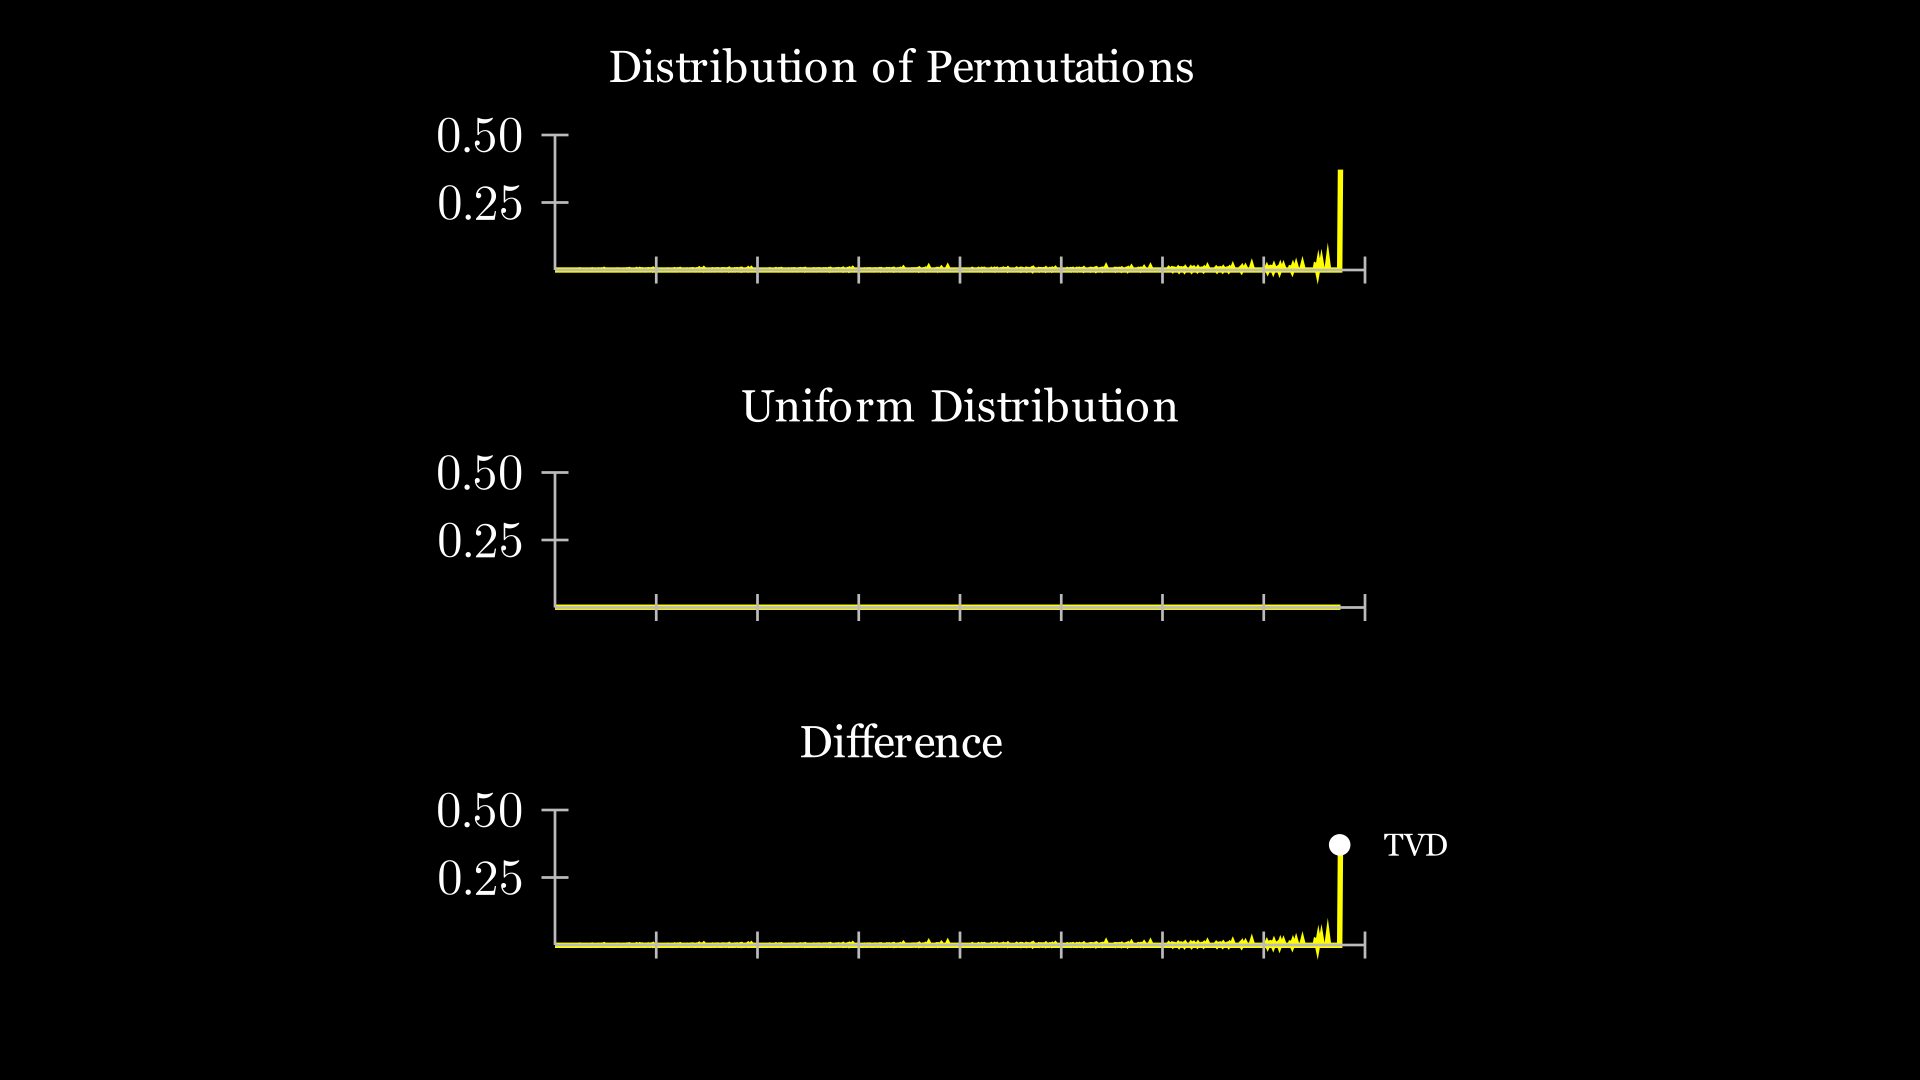

In [434]:
%%manim TVD
class TVD(Scene):
    def construct(self):
        x_len = 6
        y_len = 1
        N = 10
        shuffles = 1

        graph1 = Axes(
                x_range=[0, 2**N, (2**N)/8],
                y_range=[0, 0.5, 0.25],
                x_length=x_len,
                y_length=y_len,
                tips=False,
                y_axis_config={"include_numbers": True}
            )

        graph2 = Axes(
                x_range=[0, 2**N, (2**N)/8],
                y_range=[0, 0.5, 0.25],
                x_length=x_len,
                y_length=y_len,
                tips=False,
                y_axis_config={"include_numbers": True}
            )

        graph3 = Axes(
                x_range=[0, 2**N, (2**N)/8],
                y_range=[0, 0.5, 0.25],
                x_length=x_len,
                y_length=y_len,
                tips=False,
                y_axis_config={"include_numbers": True}
            )

        title1 = Text("Distribution of Permutations", size=0.5)
        title2 = Text("Uniform Distribution", size=0.5)
        title3 = Text("Difference", size=0.5)

        # generate a sample set of data
        maxval = int(("1"*(N//2) + "0"*(N//2)), 2) + 1  # largest valid bitstring of length L with half 1s, half 0s
        nIter = 10000
        ps = np.zeros(maxval)
        for it in range(nIter):
            r = riffle_shuffle(N, shuffles)
            identifier = int(r, 2)
            ps[identifier] += 1
        ps /= nIter

        uniform = np.ones(maxval)/maxval
        x = np.linspace(0, maxval, len(ps))

        # place graphs and titles in right locations
        graph1.shift(2.5*UP)
        graph3.shift(2.5*DOWN)
        title1.move_to(graph1)
        title1.shift(UP)

        title2.shift(UP)
        title3.move_to(graph3)
        title3.shift(UP)
        
        # create line graphs
        line1 = graph1.get_line_graph(x_values=x, y_values=ps, add_vertex_dots=False)
        line2 = graph2.get_line_graph(x, uniform, add_vertex_dots=False)
        line3 = graph3.get_line_graph(x, ps-uniform, add_vertex_dots=False)
        
        # label the TVD
        tvd_pt = Dot(graph3.coords_to_point(np.argmax(ps-uniform), max(ps-uniform)))
        label = Text("TVD", size=0.35).next_to(tvd_pt)

        self.add(graph1, graph2, graph3, title1, title2, title3, line1, line2, line3, tvd_pt, label)

In [374]:
%manim ImperfectRiffle

[12/01/21 11:23:33] INFO     Animation 0 : Using cached data (hash :    ]8;id=417517;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             450974505_1426697731_2253428237)

INFO:manim:Animation 0 : Using cached data (hash : 450974505_1426697731_2253428237)


                    INFO     Animation 1 : Using cached data (hash :    ]8;id=280713;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:107
                             34786186_1009709265_3110438328)

INFO:manim:Animation 1 : Using cached data (hash : 34786186_1009709265_3110438328)


[12/01/21 11:23:36] INFO     Animation 2 : Partial movie file        ]8;id=747100;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2203457340_3110438328.mp4'

INFO:manim:Animation 2 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2203457340_3110438328.mp4'


[12/01/21 11:23:37] INFO     Animation 3 : Partial movie file        ]8;id=995399;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_3170765466.mp4'

INFO:manim:Animation 3 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_510747927_3170765466.mp4'


                    INFO     Animation 4 : Partial movie file        ]8;id=491584;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_511117180_1007395326.mp4'

INFO:manim:Animation 4 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_511117180_1007395326.mp4'


[12/01/21 11:23:38] INFO     Animation 5 : Partial movie file        ]8;id=267740;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3179725038_2371969620.mp4'

INFO:manim:Animation 5 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3179725038_2371969620.mp4'


                    INFO     Animation 6 : Partial movie file        ]8;id=255803;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4244773304_2057805555.mp4'

INFO:manim:Animation 6 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_4244773304_2057805555.mp4'


[12/01/21 11:23:39] INFO     Animation 7 : Partial movie file        ]8;id=217329;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3238038456_59268008.mp4'

INFO:manim:Animation 7 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3238038456_59268008.mp4'


                    INFO     Animation 8 : Partial movie file        ]8;id=702529;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1147334353_2462968573.mp4'

INFO:manim:Animation 8 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1147334353_2462968573.mp4'


[12/01/21 11:23:40] INFO     Animation 9 : Partial movie file        ]8;id=894448;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_221468583_468191895.mp4'

INFO:manim:Animation 9 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_221468583_468191895.mp4'


                    INFO     Animation 10 : Partial movie file       ]8;id=744196;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1727828809_597140949.mp4'

INFO:manim:Animation 10 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1727828809_597140949.mp4'


[12/01/21 11:23:41] INFO     Animation 11 : Partial movie file       ]8;id=69394;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1134592938_179862317.mp4'

INFO:manim:Animation 11 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1134592938_179862317.mp4'


                    INFO     Animation 12 : Partial movie file       ]8;id=169345;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2114172984_2636124007.mp4'

INFO:manim:Animation 12 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2114172984_2636124007.mp4'


                    INFO     Animation 13 : Partial movie file       ]8;id=643989;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3403830081_2679983206.mp4'

INFO:manim:Animation 13 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3403830081_2679983206.mp4'


[12/01/21 11:23:43] INFO     Animation 14 : Partial movie file       ]8;id=80935;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2518554232_2211625378.mp4'

INFO:manim:Animation 14 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2518554232_2211625378.mp4'


[12/01/21 11:23:44] INFO     Animation 15 : Partial movie file       ]8;id=524475;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_4170287587.mp4'

INFO:manim:Animation 15 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_510747927_4170287587.mp4'


[12/01/21 11:23:46] INFO     Animation 16 : Partial movie file       ]8;id=768547;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_492397949_3202579416.mp4'

INFO:manim:Animation 16 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_492397949_3202579416.mp4'


[12/01/21 11:23:48] INFO     Animation 17 : Partial movie file       ]8;id=839396;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3586073781_3202579416.mp4'

INFO:manim:Animation 17 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3586073781_3202579416.mp4'


[12/01/21 11:23:49] INFO     Animation 18 : Partial movie file       ]8;id=913832;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_3216823345.mp4'

INFO:manim:Animation 18 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_510747927_3216823345.mp4'


                    INFO     Animation 19 : Partial movie file       ]8;id=441197;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2635987443_1833384128.mp4'

INFO:manim:Animation 19 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2635987443_1833384128.mp4'


[12/01/21 11:23:50] INFO     Animation 20 : Partial movie file       ]8;id=486512;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2289444585_2433890245.mp4'

INFO:manim:Animation 20 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2289444585_2433890245.mp4'


                    INFO     Animation 21 : Partial movie file       ]8;id=868045;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2117020260_1791435896.mp4'

INFO:manim:Animation 21 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2117020260_1791435896.mp4'


[12/01/21 11:23:51] INFO     Animation 22 : Partial movie file       ]8;id=864616;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3105968342_1105452809.mp4'

INFO:manim:Animation 22 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3105968342_1105452809.mp4'


                    INFO     Animation 23 : Partial movie file       ]8;id=129831;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3986245164_854104638.mp4'

INFO:manim:Animation 23 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3986245164_854104638.mp4'


[12/01/21 11:23:52] INFO     Animation 24 : Partial movie file       ]8;id=145227;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_3385769986_299692859.mp4'

INFO:manim:Animation 24 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_3385769986_299692859.mp4'


                    INFO     Animation 25 : Partial movie file       ]8;id=175060;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1007581843_3755866300.mp4'

INFO:manim:Animation 25 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1007581843_3755866300.mp4'


[12/01/21 11:23:53] INFO     Animation 26 : Partial movie file       ]8;id=14426;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_1369854158_346010307.mp4'

INFO:manim:Animation 26 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_1369854158_346010307.mp4'


                    INFO     Animation 27 : Partial movie file       ]8;id=169698;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2690849614_877652652.mp4'

INFO:manim:Animation 27 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2690849614_877652652.mp4'


[12/01/21 11:23:54] INFO     Animation 28 : Partial movie file       ]8;id=332008;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_2823028085_3642529355.mp4'

INFO:manim:Animation 28 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_2823028085_3642529355.mp4'


[12/01/21 11:23:56] INFO     Animation 29 : Partial movie file       ]8;id=513312;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_4225840635_1037058239.mp4'

INFO:manim:Animation 29 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_4225840635_1037058239.mp4'


[12/01/21 11:23:57] INFO     Animation 30 : Partial movie file       ]8;id=501102;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in 'C:\Users\aaron\eps109\Final                         
                             Project\media\videos\Final Project\1080                         
                             p60\partial_movie_files\ImperfectRiffle                         
                             \34786186_510747927_992424914.mp4'

INFO:manim:Animation 30 : Partial movie file written in 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\partial_movie_files\ImperfectRiffle\34786186_510747927_992424914.mp4'


                    INFO                                             ]8;id=358682;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\videos\Final                                      
                             Project\1080p60\ImperfectRiffle.mp4'

INFO:manim:
File ready at 'C:\Users\aaron\eps109\Final Project\media\videos\Final Project\1080p60\ImperfectRiffle.mp4'



                    INFO     The partial movie directory is full (>  ]8;id=675465;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:575
                             100 files). Therefore, manim has                                
                             removed 29 file(s) used by it the                               
                             longest ago.You can change this                                 
                             behaviour by changing max_files_cached                          
                             in config.

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed 29 file(s) used by it the longest ago.You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered ImperfectRiffle                            ]8;id=669362;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 31 animations

INFO:manim:Rendered ImperfectRiffle
Played 31 animations


[12/12/21 22:59:06] INFO                                             ]8;id=110510;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at                                                   
                             'C:\Users\aaron\eps109\Final                                    
                             Project\media\images\Final                                      
                             Project\ShuffleTest_ManimCE_v0.9.0.png'

INFO:manim:
File ready at 'C:\Users\aaron\eps109\Final Project\media\images\Final Project\ShuffleTest_ManimCE_v0.9.0.png'



                    INFO     Rendered ShuffleTest                                ]8;id=917587;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:233
                             Played 0 animations

INFO:manim:Rendered ShuffleTest
Played 0 animations


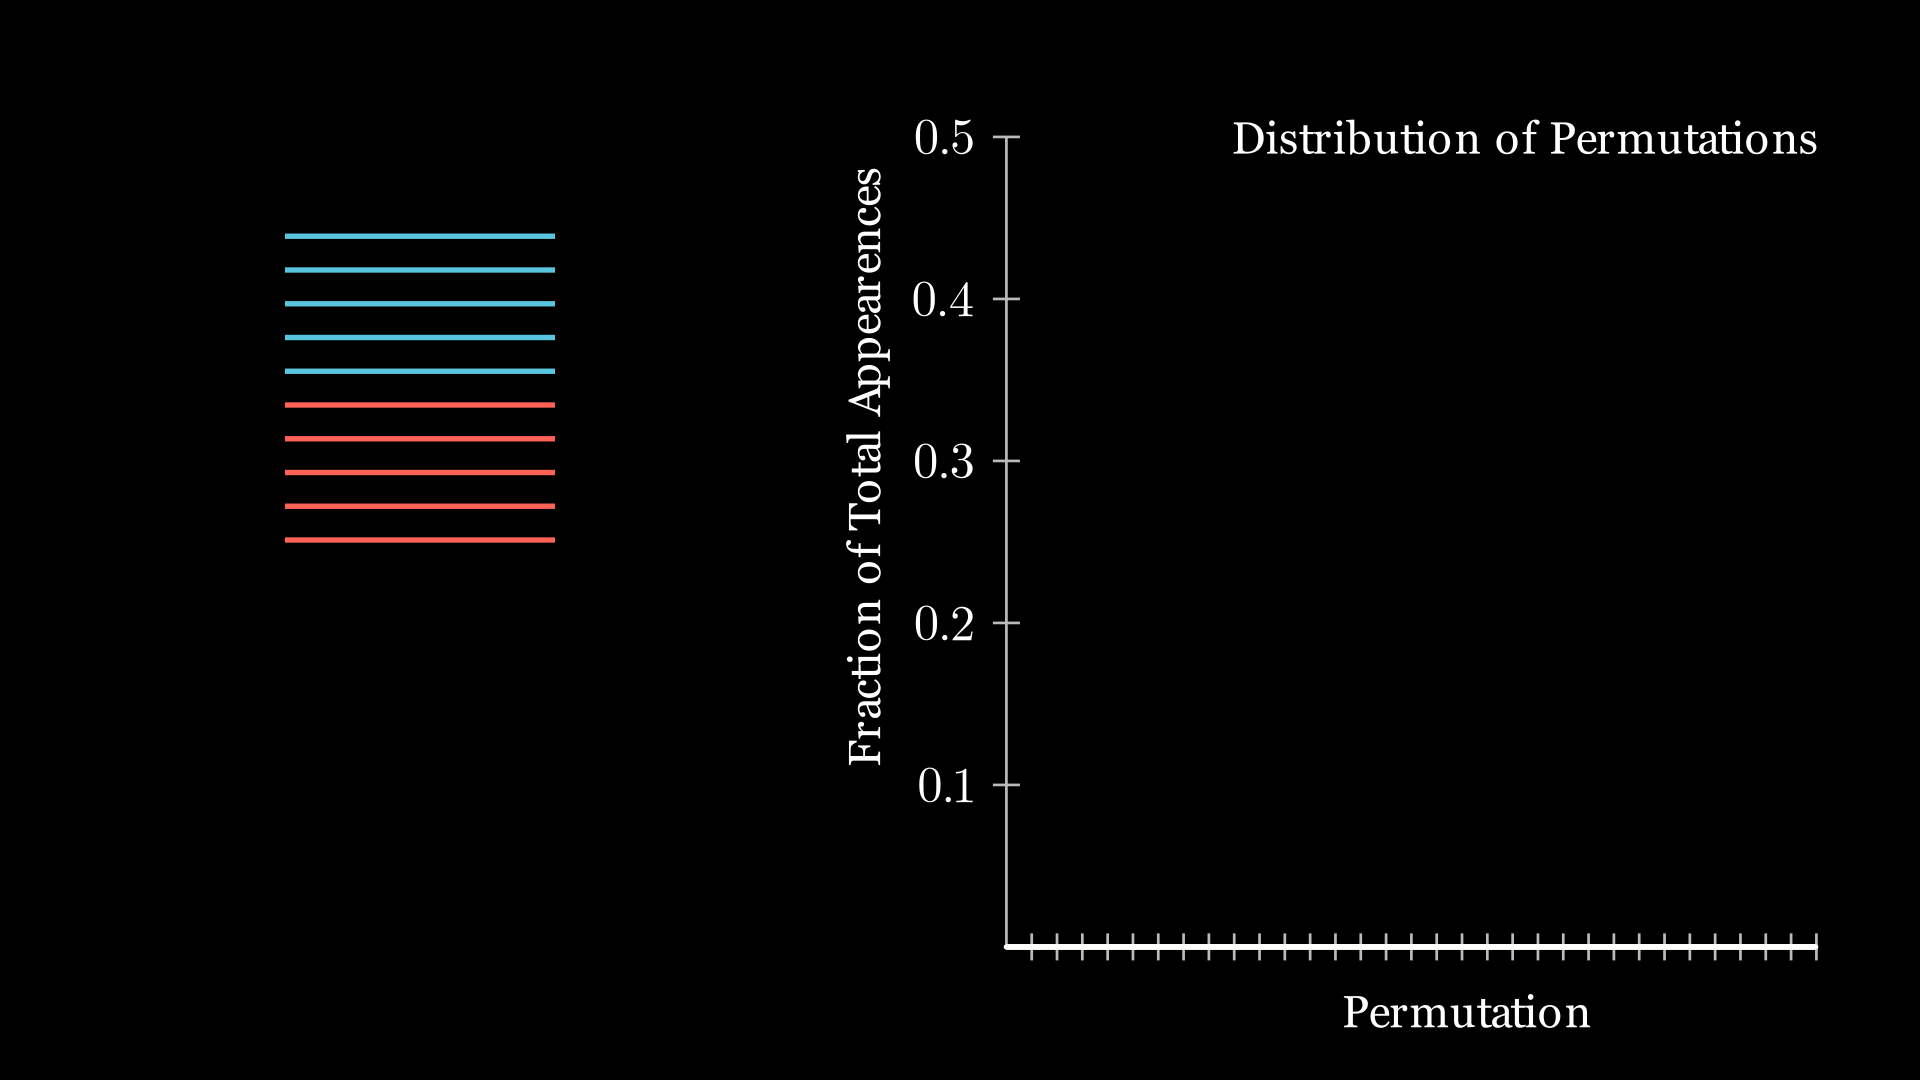

In [421]:
%%manim ShuffleTest
class ShuffleTest(Scene):
    def construct(self):
        N = 10
        epsilon = 0.25  # indicates horizontal distance between halves of the deck
        squish = 0.25  # 0 <= squish <= 1, indicates distance between cards
        deck_x = -4
        graph_x = 0
        x_len = 6
        y_len = 6
        max_shuffles = 1
        
        # create graph mobject
        ax = Axes(
            x_range=[0, 2**N, (2**(N//2))],
            y_range=[0, 0.5, 0.1],
            x_length=x_len,
            y_length=y_len,
            tips=False,
            y_axis_config={"include_numbers": True}
        )
        ax.move_to([graph_x + (x_len//2), 0, 0])
        self.add(ax)
        text = Text("Distribution of Permutations", size=0.5)
        text.align_to(ax, 2*UP + 0.5*RIGHT)
        self.add(text)
        start_graph = ax.get_line_graph(x_values=[x for x in range(2**N)], y_values=[0 for _ in range(2**N)], add_vertex_dots=True, vertex_dot_radius=0.02)
        self.add(start_graph)
        
        x_label = ax.get_x_axis_label(Text("Permutation", size=0.5), edge=DOWN, buff=-0.5)
        y_label = ax.get_y_axis_label(Text("Fraction of Total Appearences", size=0.5).rotate(90*DEGREES), edge=(LEFT), buff=-0.5).shift(DOWN)
        self.add(x_label, y_label)
        
        # build the starting deck
        starts = [[-1 + deck_x, y*squish, 0] for y in range(N)]
        ends = [[1 + deck_x, y*squish, 0] for y in range(N)]

        red_lines = [Line(a, b, color=RED) for a, b in zip(starts[:N//2], ends[:N//2])]
        blue_lines = [Line(a, b, color=BLUE) for a, b in zip(starts[N//2:], ends[N//2:])]
        deck = red_lines + blue_lines
        self.add(*deck)
        
        curr_graph = start_graph